# Project Title : Predicting whether a customer will default on his/her credit card

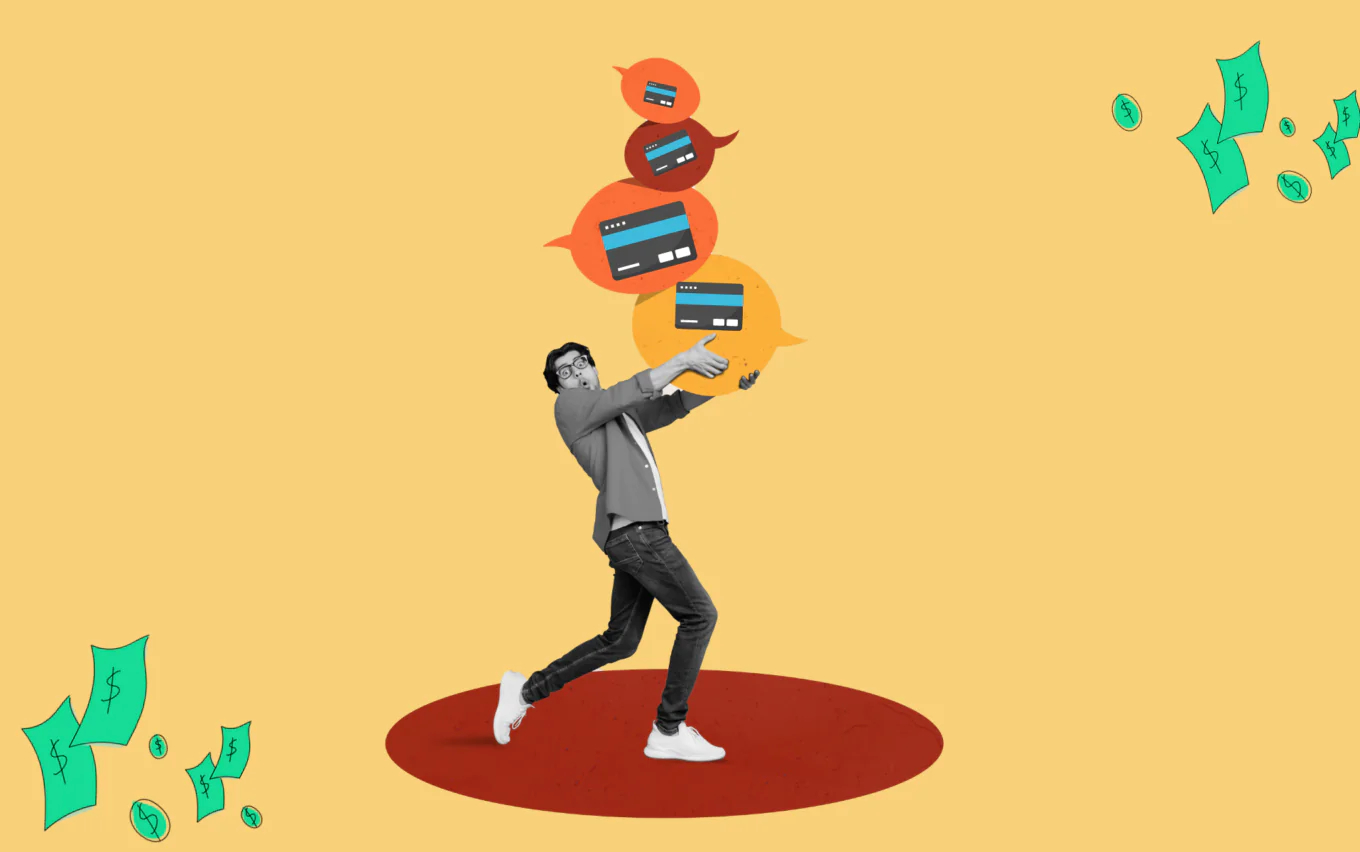!

# 1. Problem Description

This project is about predicting whether customers in Taiwan will miss their credit card payments. Instead of just saying if a customer is good or bad, it is more useful to know how likely they are to miss a payment. This helps in managing financial risk better.

To check how well our prediction works, we can use a K-S chart, which shows how well the model separates customers who will default from those who will not.

Credit cards offer high returns but also carry big risks due to rising defaults. With more users, there's more data, making it harder for banks to manage risk.

A Taiwan-based credit card company wants to understand:

Which customers are likely to default, and

What factors affect this.

This will help the bank make better decisions about:

Who should get a credit card

How much credit to give

Planning better and safer financial products


## Our Objectives:

#### Identify the key factors that lead to credit card default.

#### Predict the chance of a customer defaulting on their payment.


## **1.2 Business Context:**
    
The aim of credit card default prediction is to help lenders reduce losses by identifying users who may miss payments.

By knowing this in advance, companies can:

Set lower credit limits

Charge higher interest rates

Take steps to reduce risk

This helps keep the credit card business safe and stable. Machine learning is used to analyze past data and predict future payment behavior accurately.

## **1.3 Attribute Summary:**    Know Your Data

Target Variable:

Default payment next month: Binary (Yes = 1, No = 0)

 Features (X1 – X23):
X1: Credit limit (includes individual and family credit)

X2: Gender (1 = Male, 2 = Female)

X3: Education (1 = Graduate, 2 = University, 3 = High School, 4 = Others)

X4: Marital Status (1 = Married, 2 = Single, 3 = Others)

X5: Age (in years)

Payment History (X6 – X11):
Repayment status from April to Sept 2005

-1 = Paid on time, 1–9 = Delay (1 to 9+ months)

Bill Amounts (X12 – X17):
Monthly bill amounts from April to Sept 2005 (NT dollars)

Payments Made (X18 – X23):
Actual payments made from April to Sept 2005 (NT dollars)



## 1.4 Index
1. Problem Statement
2. Know Your Data
3. Understanding Your Variables
4. EDA
5. Data Cleaning
6. Hypothesis Testing
7. Feature Engineering
8. Model Building
9. Model Implementaion.
10. Conclusion

##  2. Import Libraries

In [8]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14356\2278717110.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


## 2.1 Dataset Loading

path = "C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\sklearn"


In [11]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\advance project for internship\credit_card_defaulter_prediction\default of credit card clients.xls - Data.csv", header=1)


In [12]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2.2 Dataset Rows & Columns Count

In [14]:
# Check data shape
df.shape


(30000, 25)

## 2.3 Dataset Information

In [16]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
#Data Description   (T. rows become columns and columns become rows. to see wast data)
df.describe().T       # Transposes the summary for better readability      

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

## 2.4 Duplicate Values

Duplicate records are identical rows in a dataset, often caused by data entry errors. Removing them is important to save time, avoid redundancy, and improve model accuracy.


In [20]:
len(df[df.duplicated()])  # uses duplicated() to find duplicate rows and len() to count them


0

In [21]:
# Hence no duplicates are present in the data.

In [22]:
#columns of dataset
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## 2.5 Missing Values/Null Values


**Why dealing with missing values is necessary:**

Real-world data often has some empty or missing values because of errors or data loss. Most machine learning models can’t work properly with missing data. So, before training a model, it’s important to find and fix these missing values during data cleaning.


In [24]:
# Taking the sum of null values in columns from a dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

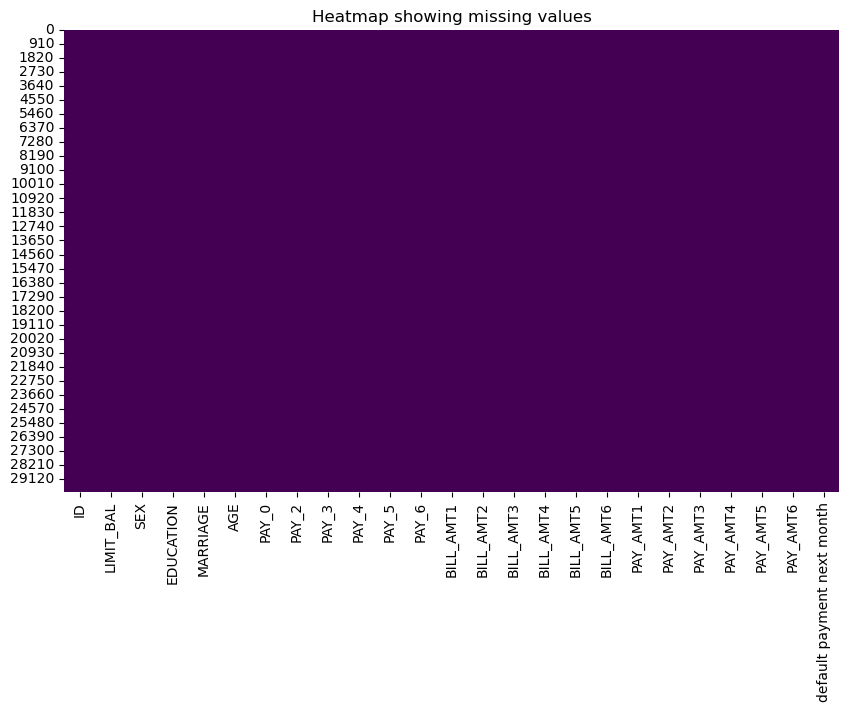

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap showing missing values')
plt.show()


In [26]:
print(df.isnull().sum().sum())  # total missing values count


0


From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

The dataset has 30,000 rows and 25 columns with no duplicates or missing data. It comes from the banking sector and focuses on predicting which customers might default on their credit payments by analyzing their data to identify risks early.

## 3. Understanding Your Variables

In [30]:

 # Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## 3.1  Variables Description
The dataset contains data from credit card indistry in Taiwan and has collected the usage, historical payments and default status of the customers.

Attribute Information:

ID : ID of each client
LIMIT_BAL : Amount of given credit in NT dollars
SEX : Gender (1=male, 2=female)
EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE : Marital status (1=married, 2=single, 3=others)
AGE : Age in years
PAY_0 : Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2 : Repayment status in August, 2005 (scale same as above)
PAY_3 : Repayment status in July, 2005 (scale same as above)
PAY_4 : Repayment status in June, 2005 (scale same as above)
PAY_5 : Repayment status in May, 2005 (scale same as above)
PAY_6 : Repayment status in April, 2005 (scale same as above)
BILL_AMT1 : Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2 : Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3 : Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4 : Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5 : Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6 : Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1 : Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2 : Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3 : Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4 : Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5 : Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6 : Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month : Default payment (1=yes, 0=no)

## 3.2 Unique Values


In [33]:

# print the unique value
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [34]:
# Check and print the number of unique values for each column in the dataframe
for i in df.columns.tolist():
    print("unique values in is", i, "is", df[i].nunique())


unique values in is ID is 30000
unique values in is LIMIT_BAL is 81
unique values in is SEX is 2
unique values in is EDUCATION is 7
unique values in is MARRIAGE is 4
unique values in is AGE is 56
unique values in is PAY_0 is 11
unique values in is PAY_2 is 11
unique values in is PAY_3 is 11
unique values in is PAY_4 is 11
unique values in is PAY_5 is 10
unique values in is PAY_6 is 10
unique values in is BILL_AMT1 is 22723
unique values in is BILL_AMT2 is 22346
unique values in is BILL_AMT3 is 22026
unique values in is BILL_AMT4 is 21548
unique values in is BILL_AMT5 is 21010
unique values in is BILL_AMT6 is 20604
unique values in is PAY_AMT1 is 7943
unique values in is PAY_AMT2 is 7899
unique values in is PAY_AMT3 is 7518
unique values in is PAY_AMT4 is 6937
unique values in is PAY_AMT5 is 6897
unique values in is PAY_AMT6 is 6939
unique values in is default payment next month is 2


**Observations:**
  
We are focusing on several key columns of our dataset, including 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', and 'PAY_AMT' as they contain a wealth of information.
By utilizing these features, we plan to create a classification model and implement various classification algorithms.

### Data Processing

##### 4.1 Changing name of some columns for simplicity and better understanding

In [38]:
#renaming of columns
df.rename(columns={'default payment next month' : 'target_default'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

##### Target Column:
**'default payment next month' → 'target_default'**

**payment Status (PAY_):**
'PAY_0' to PAY_6' → 'PAY_SEPT' to PAY_APR'

**Bill Amount (BILL_AMT):**
'BILL_AMT1 to BILL_AMT6' → 'BILL_AMT_SEPT' to BILL_AMT_APR'

**Payment Amount (PAY_AMT):**
'PAY_AMT1 to PAY_AMT6' → 'PAY_AMT_SEPT' to PAY_AMT_APR'



In [40]:
#check for rename

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target_default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## label mapping

In [42]:
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)  # replaces numeric gender codes with 'Male' and 'Female'

df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)  # maps education codes to readable labels

df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)  # replaces marital status codes with string labels

df.replace({'target_default' : {1 : 'Yes', 0 : 'No'}}, inplace = True)  # converts binary default values to 'Yes' and 'No'


In [43]:
#checking for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target_default
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


##  4. EDA (Exploratory Data Analysis)

**What is EDA?**

Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.

In [45]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'target_default'],
      dtype='object')

In [46]:
numerical_features = []
categorical_features = []

# Loop over columns in df (your main dataframe)
for col in df.columns:
    # Check unique values count in df[col]
    unique_count = df[col].nunique()
    
    # If unique values > 15, treat as numerical, else categorical
    if unique_count > 15:
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')


Numerical Features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'target_default']


In [47]:
#Value counts of PaymentDefaultr
df['target_default'].value_counts()

target_default
No     23364
Yes     6636
Name: count, dtype: int64

Here we can see defaulters are less as compare to Non defaulter in the given dataset, So we can say that we have imbalanced dataset

#### Observation:

The count of default payments is 6636 while the count of not default payments is 23364.
By percentage 22.1% of customers defaulted on their payment whereas 77.9% of customers do not default on their credit card payment.
This indicates a high class imbalance in the dataset, with far fewer defaults.
We'll address this imbalance during the feature engineering phase to ensure fair model training.

## Independent Variable

##### Categorical Features

###### We have few categorical features in our dataset. Let'Check how they are related with out target class.

## Sex

In [52]:
#Value counts for sex category
df['SEX'].value_counts()

SEX
Female    18112
Male      11888
Name: count, dtype: int64

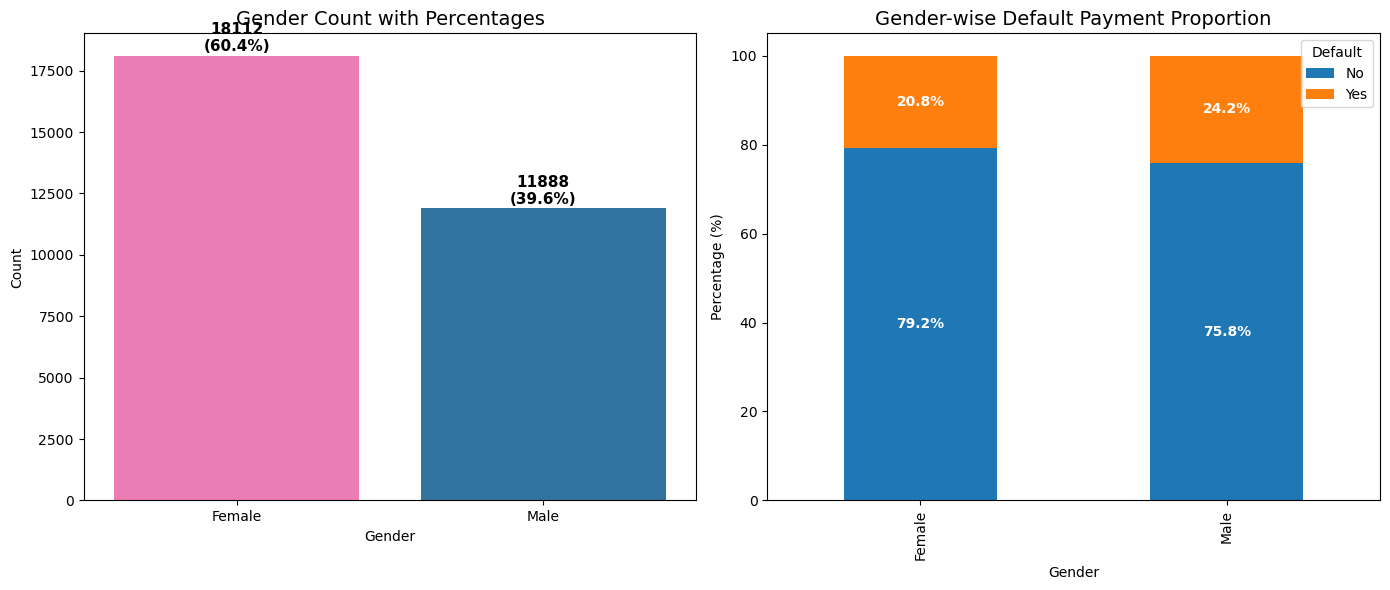

In [53]:

# Replace numeric with readable labels (as you did)
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})
df['target_default'] = df['target_default'].replace({0: 'No', 1: 'Yes'})

# Count gender total and percentage for Plot 1
gender_counts = df['SEX'].value_counts()
gender_percent = 100 * gender_counts / gender_counts.sum()

# Palette
palette_count = {'Male': '#1f77b4', 'Female': '#ff69b4'}  # blue and pinkish
palette_default = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # blue and orange

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Gender Count + % labels
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=palette_count, ax=axes[0])
axes[0].set_title('Gender Count with Percentages', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

for i, count in enumerate(gender_counts):
    pct = gender_percent[i]
    axes[0].text(i, count + max(gender_counts)*0.01, f'{count}\n({pct:.1f}%)', 
                 ha='center', fontsize=11, fontweight='bold')

# Plot 2: Stacked bar for Gender-wise default proportion
# Create pivot table of counts
pivot = pd.crosstab(df['SEX'], df['target_default'], normalize='index') * 100

pivot.plot(kind='bar', stacked=True, color=[palette_default['No'], palette_default['Yes']], ax=axes[1])

axes[1].set_title('Gender-wise Default Payment Proportion', fontsize=14)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Default', loc='upper right')

# Add % labels inside bars
for i, gender in enumerate(pivot.index):
    bottom = 0
    for j, default_status in enumerate(pivot.columns):
        val = pivot.loc[gender, default_status]
        if val > 5:  # Show label only if wide enough for visibility
            axes[1].text(i, bottom + val/2, f'{val:.1f}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')
        bottom += val

plt.tight_layout()
plt.show()


#### Observation:

There are 18112 females and 11888 males in the data set.
About 24% percent of males defaulted and about 21% of the female defaulted.
Number of males who defaulted is less in number but the proportion is greater. It might be possible because males have fewer credit limits on their credit cards as we can see in the graph too.

## Education

##### As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [56]:
#Value counts for education category
df['EDUCATION'].value_counts()

EDUCATION
University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: count, dtype: int64

In [57]:
fil = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)
df.loc[fil, 'EDUCATION'] = 'Others'

In [58]:
#Value counts for education category
df['EDUCATION'].value_counts()

EDUCATION
University         14030
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64

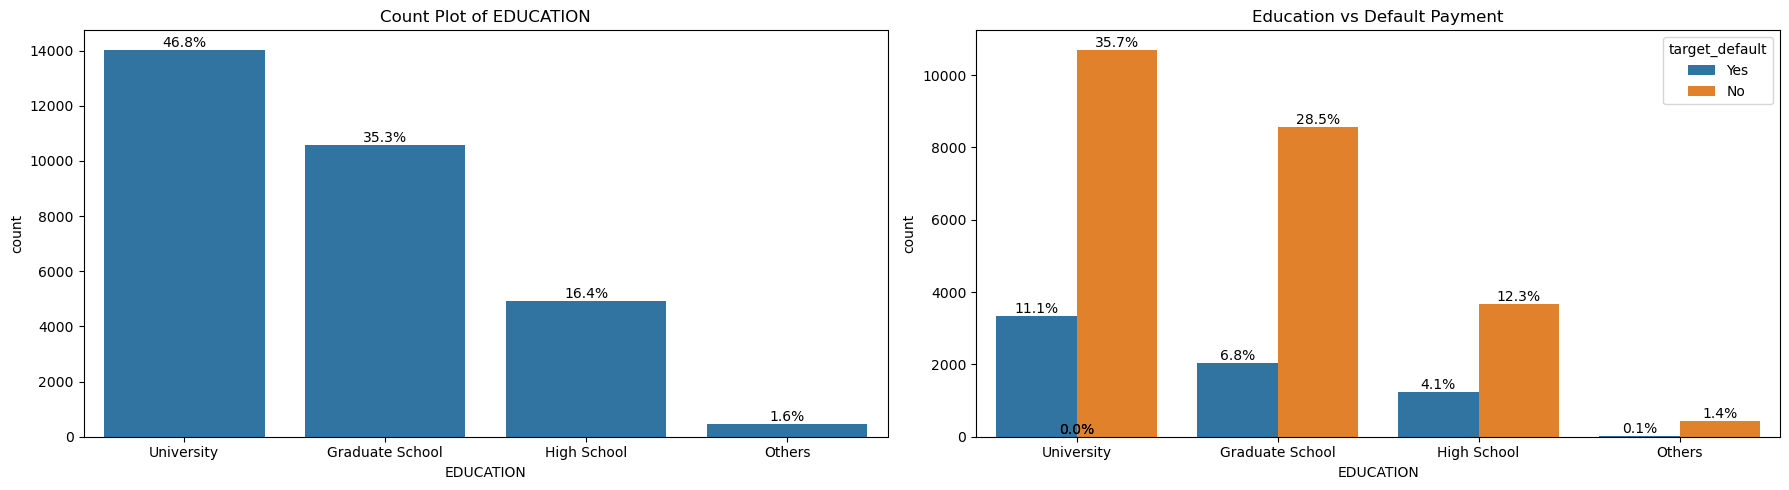

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

# Count plot of EDUCATION (total counts)
sns.countplot(x='EDUCATION', data=df, ax=axes[0])
axes[0].set_title('Count Plot of EDUCATION')

# Add % labels on top of bars (total count plot)
total = len(df)
for p in axes[0].patches:
    height = p.get_height()
    percent = f'{100 * height / total:.1f}%'
    axes[0].annotate(percent, (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

# Count plot of EDUCATION with hue=target_default (split by defaulter)
sns.countplot(x='EDUCATION', hue='target_default', data=df, ax=axes[1])
axes[1].set_title('Education vs Default Payment')

# Add % labels on each bar (hue count plot)
for p in axes[1].patches:
    height = p.get_height()
    percent = f'{100 * height / total:.1f}%'
    axes[1].annotate(percent, (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Observation:

10,585 people with degrees from graduate schools; 14,030 individuals with college degrees; 4,917 people with high school degrees. Count of customers who has completed University is most in numbers followed by Graduate School and High School.
With the rise in education level proportion of default decreases. We can see that Graduate School education level customers defaulted by 19% while University Education level customer default percentage is 24% followed by High School with 25%.
In almost all education levels females have less default percentage than males.

## Marriage

In [62]:
#Value counts for marriage category
fil = df['MARRIAGE']==0
df.loc[fil,'MARRIAGE'] = 'Others'
df['MARRIAGE'].value_counts()

MARRIAGE
Single     15964
Married    13659
Others       377
Name: count, dtype: int64

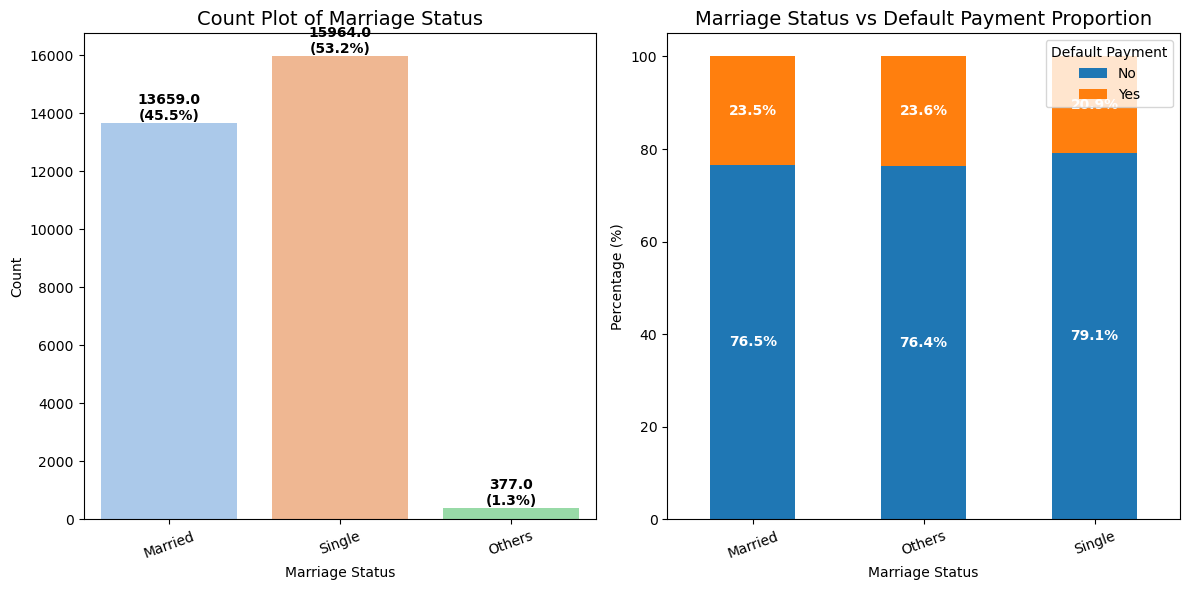

In [63]:

# Assuming 'df' and columns are already prepared

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Total count of each marriage status with % labels
total = len(df)
sns.countplot(x='MARRIAGE', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Count Plot of Marriage Status', fontsize=14)
axes[0].set_xlabel('Marriage Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=20)

for p in axes[0].patches:
    height = p.get_height()
    percent = 100 * height / total
    axes[0].annotate(f'{height}\n({percent:.1f}%)', 
                     (p.get_x() + p.get_width() / 2, height), 
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# Right: Stacked bar plot for Marriage status vs Default Payment proportion
pivot_df = pd.crosstab(df['MARRIAGE'], df['target_default'], normalize='index') * 100
pivot_df.plot(kind='bar', stacked=True, color=['tab:blue', 'tab:orange'], ax=axes[1])

axes[1].set_title('Marriage Status vs Default Payment Proportion', fontsize=14)
axes[1].set_xlabel('Marriage Status')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=20)
axes[1].legend(title='Default Payment', loc='upper right')

# Add percentage labels inside bars for better clarity
for i, status in enumerate(pivot_df.index):
    bottom = 0
    for j, col in enumerate(pivot_df.columns):
        val = pivot_df.loc[status, col]
        if val > 5:  # only add label if bar segment is visible enough
            axes[1].text(i, bottom + val/2, f'{val:.1f}%', ha='center', va='center', color='white', fontweight='bold')
        bottom += val

plt.tight_layout()
plt.show()


#### Observation:

13,659 people who are married; 15,964 single people; 323 people who divorced; 54 people who are considered "others." Count of customers who are single is most in numbers followed by married and divorced.
The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).
In all Marital status females have less default percentage than males.

##  Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

## Age



#### Plotting graph of number of ages of all people with credit card irrespective of gender.

#### age wise values of credit card holder

In [68]:
df['AGE'].value_counts()



AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

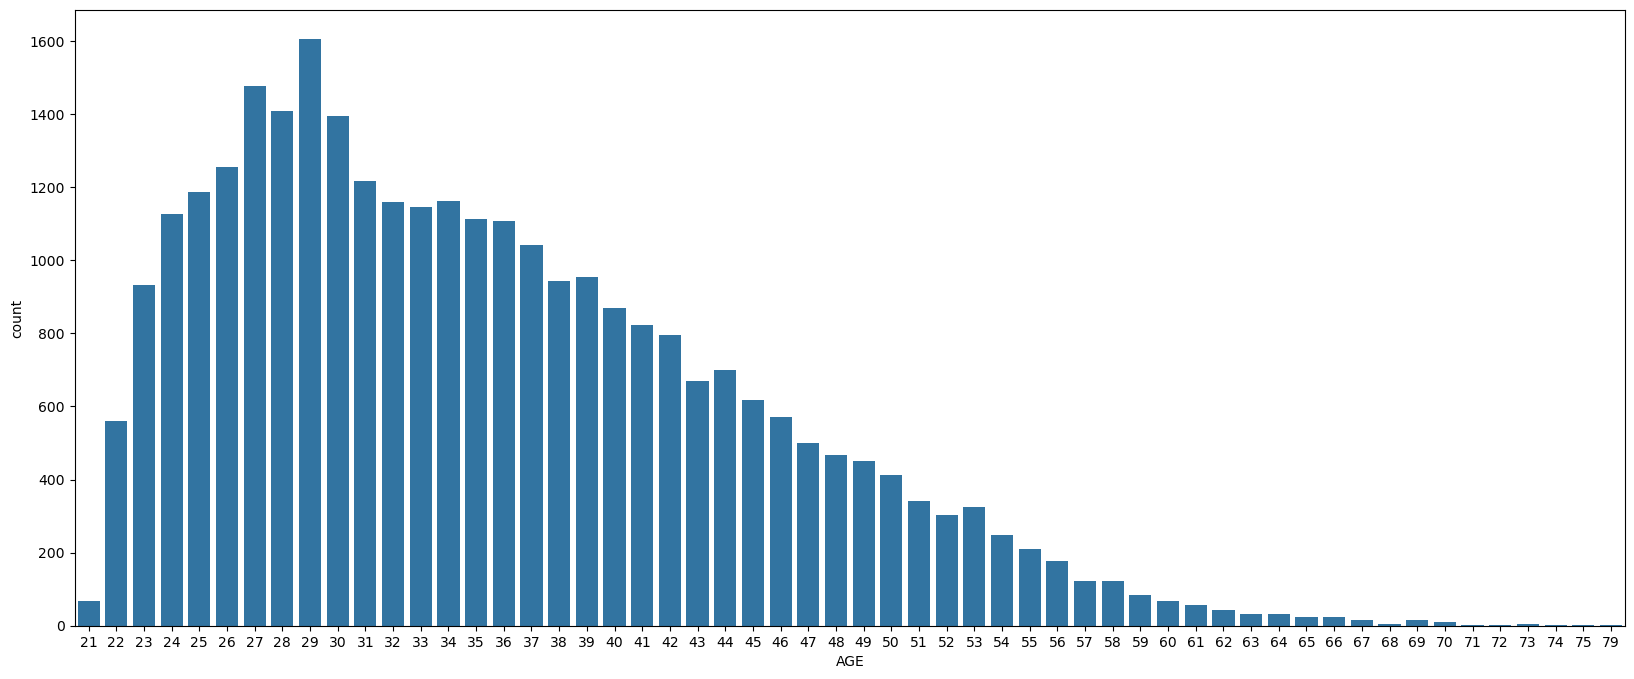

In [69]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

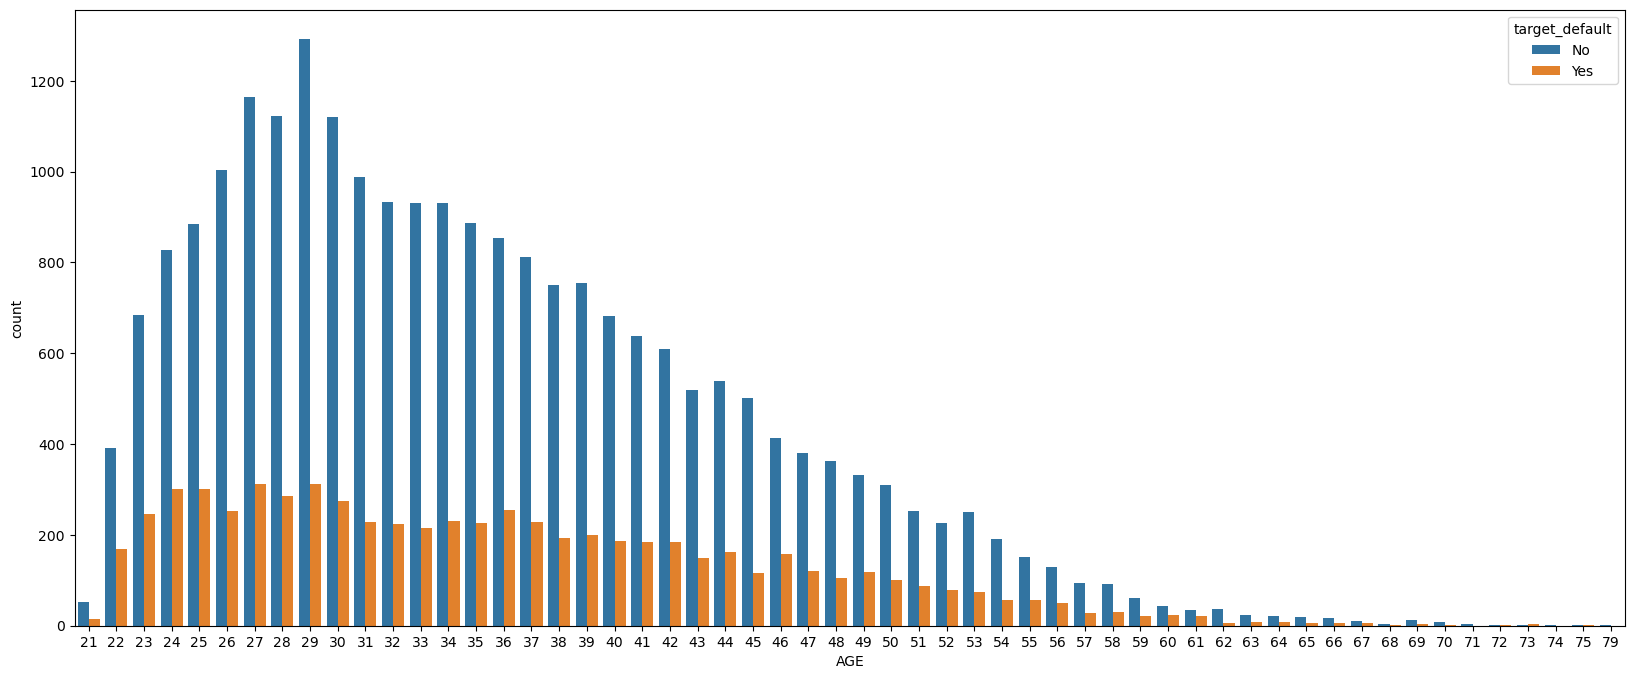

In [70]:
#values count for Age with respect to target_default
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'target_default', data = df)

#### Observation:

With the increase in age the count of customers decreases. Most of the customers belong to the 20-30 year age group followed by the 30-40 age group.
With an increase in the age group the count of default payments decreases.

## Column: 'LIMIT_BAL'

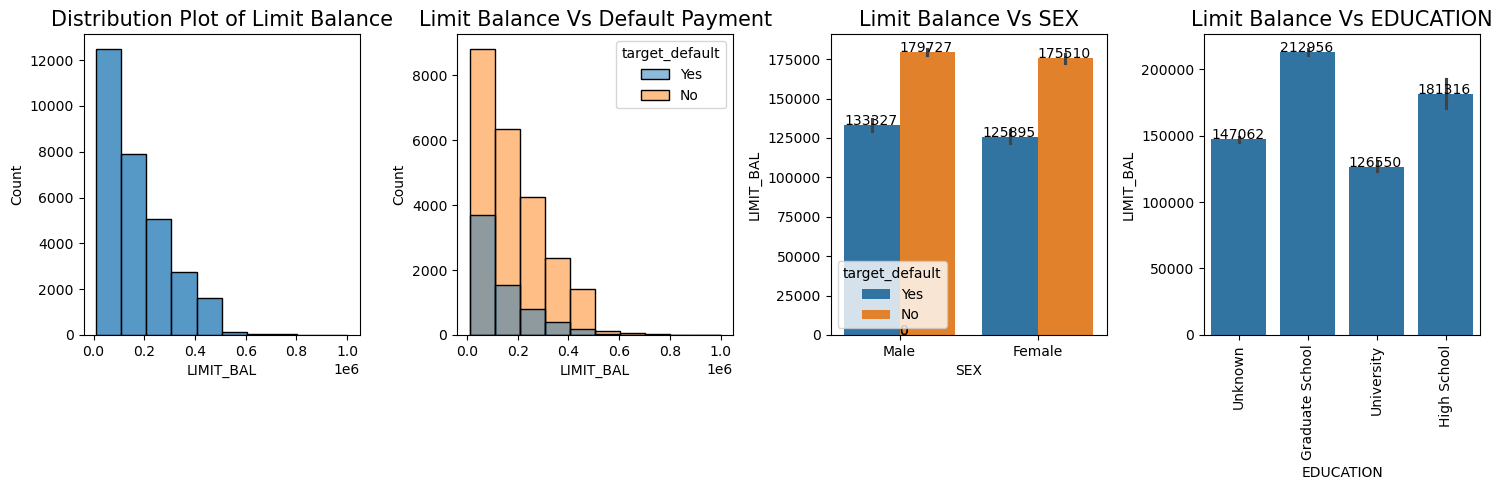

In [73]:
fig,ax = plt.subplots(1,4, figsize=(15,5))

# Distribution analysis of Limit Balance
hist = sns.histplot(df['LIMIT_BAL'],bins=10, ax=ax[0])
hist.set_title('Distribution Plot of Limit Balance', size=15)

# Bi-variate analysis
# Limit Balance Vs Default Payment
hist = sns.histplot(data=df, x='LIMIT_BAL', hue='target_default',bins=10, ax=ax[1])
hist.set_title('Limit Balance Vs Default Payment', size=15)

# Multi-variate analysis
# Limit Balance Vs SEX
bar = sns.barplot(data=df, x='SEX', y='LIMIT_BAL',hue='target_default', ax=ax[2])
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

# Bi-variate analysis
# Limit Balance Vs EDUCATION
bar = sns.barplot(data=df, x='EDUCATION', y='LIMIT_BAL', ax=ax[3])
bar.set_title('Limit Balance Vs EDUCATION', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
bar.set_xticklabels(['Unknown','Graduate School', 'University', 'High School', 'Others', 'Unknown', 'Unknown'])

# Set x-ticks rotation to 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
     

#### Observation:

Most of the customers get up to 2 lakhs of credit limit balance.
There appears to be a negative correlation between the percentage of defaults and credit limit.
On average females gets more limit than males. The female has an average of 170k while the male has an average of 163k.
Graph also indicates that higher education means a higher credit limit. We have to categorize all the unknown education categories as one.###

## 4.8 Columns: 'Payment History'

In [76]:
#Converting wide PAY columns to long format and replacing numeric codes with readable status labels.

#Then calculating the percentage of each payment status per month for analysis or plotting.

# Step 1: Replace numeric codes with readable labels

df.replace({
    'SEX': {1: 'Male', 2: 'Female'},
    'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'},
    'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Others'},
    'target_default': {1: 'Yes', 0: 'No'}
}, inplace=True)

# Step 2: Melt PAY columns into long format
melted_df = df.melt(
    value_vars=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'],
    var_name='Month',
    value_name='Payment_Status'
)

# Step 3: Count each Payment_Status per Month
grouped_df = melted_df.groupby(['Month', 'Payment_Status']).size().reset_index(name='Count')

# Step 4: Replace payment status codes with readable labels
value_map = {
    -2: 'No consumption',
    -1: 'Paid duly',
     0: 'Revolving credit',
     1: '1 month delay',
     2: '2 month delay',
     3: '3 month delay',
     4: '4 month delay',
     5: '5 month delay',
     6: '6 month delay',
     7: '7 month delay',
     8: '8 month delay',
     9: '9+ month delay'
}
grouped_df['Payment_Status'] = grouped_df['Payment_Status'].replace(value_map)

# Step 5: Calculate percentage of each status per month
grouped_df['Percentage'] = grouped_df['Count'] / grouped_df.groupby('Month')['Count'].transform('sum') * 100

# Final result
print(grouped_df.head())

     Month    Payment_Status  Count  Percentage
0  PAY_APR    No consumption   4895   16.316667
1  PAY_APR         Paid duly   5740   19.133333
2  PAY_APR  Revolving credit  16286   54.286667
3  PAY_APR     2 month delay   2766    9.220000
4  PAY_APR     3 month delay    184    0.613333


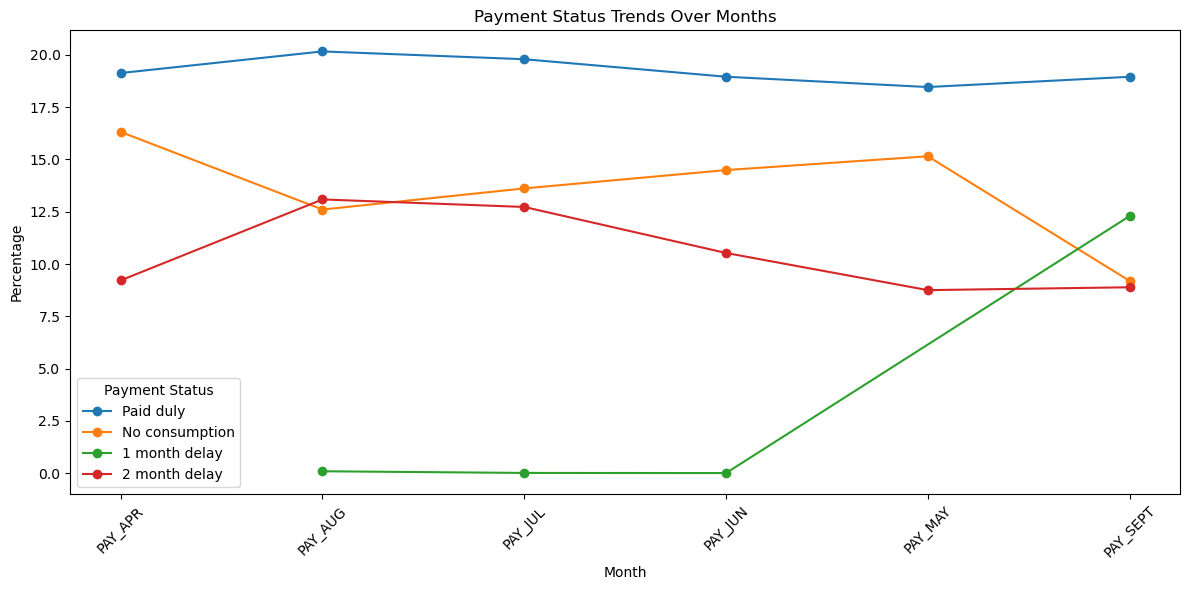

In [77]:
plt.figure(figsize=(12,6))

for status in ['Paid duly', 'No consumption', '1 month delay', '2 month delay']:
    subset = grouped_df[grouped_df['Payment_Status'] == status]
    plt.plot(subset['Month'], subset['Percentage'], marker='o', label=status)

plt.title('Payment Status Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Payment Status')
plt.tight_layout()
plt.show()


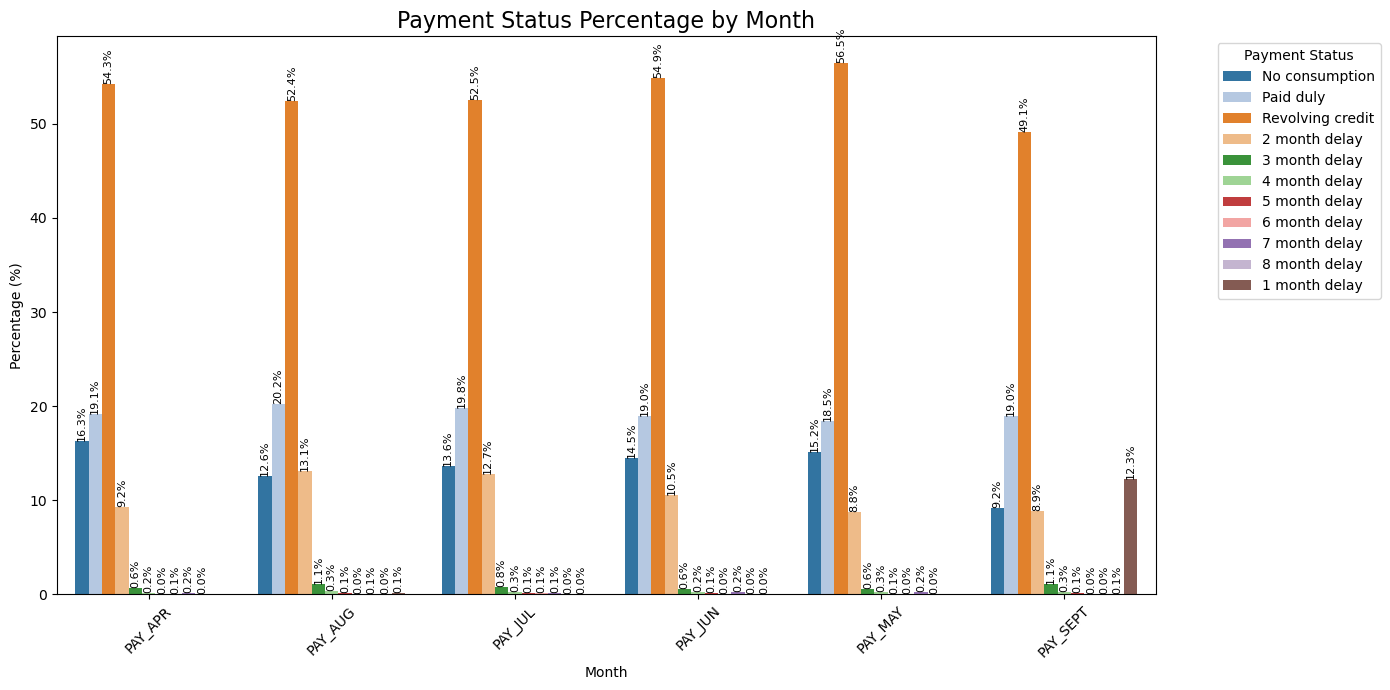

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.barplot(data=grouped_df, x='Month', y='Percentage', hue='Payment_Status', palette='tab20')

plt.title('Payment Status Percentage by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Adding percentage labels on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.1f}%', 
                           (p.get_x() + p.get_width() / 2, height), 
                           ha='center', va='bottom', fontsize=8, rotation=90)

plt.legend(title='Payment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


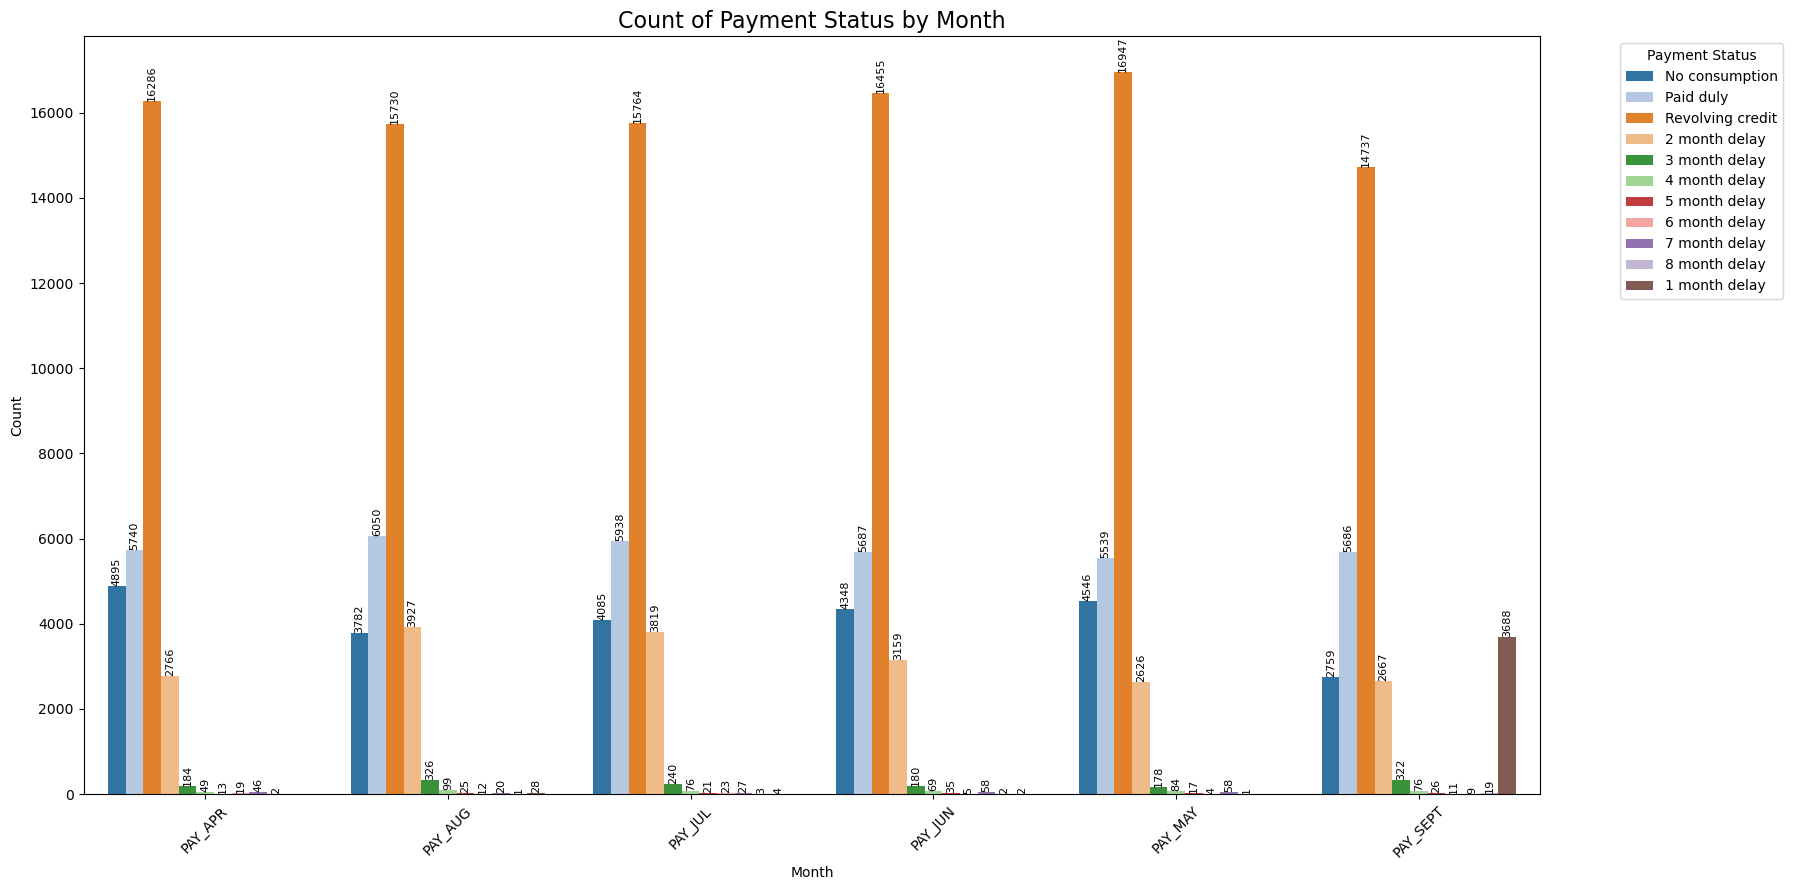

In [79]:
plt.figure(figsize=(18,9))
sns.barplot(data=grouped_df, x='Month', y='Count', hue='Payment_Status', palette='tab20')

plt.title('Count of Payment Status by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding count labels
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}', 
                           (p.get_x() + p.get_width() / 2, height), 
                           ha='center', va='bottom', fontsize=8, rotation=90)

plt.legend(title='Payment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Observation:

In every month's payment history, most customers are from revolving credit followed by paid.
Customers with payment delay in all the payment history have the most number in 2-month payment delay means a 2-month payment delay is a critical sign of the default of the payment.

## 4.9 Columns: 'Bill Amounts'

In [82]:
# Creating few columns to consolidate all the bill amounts
df['Sum_all_bill'] = df['BILL_AMT_SEPT'] + df['BILL_AMT_AUG'] + df['BILL_AMT_JUL'] + \
                     df['BILL_AMT_JUN'] + df['BILL_AMT_MAY'] + df['BILL_AMT_APR']

df['Avg_bill'] = df['Sum_all_bill'] / 6


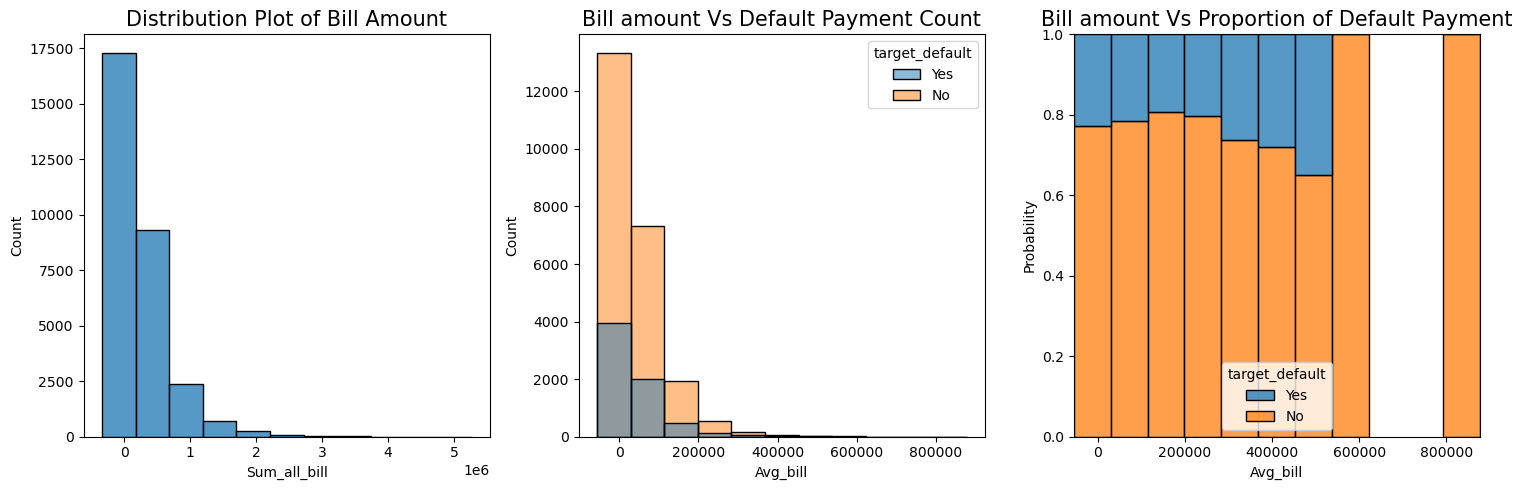

In [83]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Distribution analysis of Bill Amount
hist = sns.histplot(df['Sum_all_bill'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Bill Amount', size=15)

# Bi-variate analysis
# Bill amount Vs Default Payment Count
hist = sns.histplot(data=df, x='Avg_bill', hue='target_default',bins=11, ax=ax[1])
hist.set_title('Bill amount Vs Default Payment Count', size=15)

# Bi-variate analysis
# Bill amount Vs Proportion of Default Payment
hist = sns.histplot(data=df, x='Avg_bill', hue='target_default', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Bill amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()
     

Observation:

In all the bill amounts there are some negative bill amount records means the bill amount value is less than zero.
Most of the defaults are from customers who have negative and up to 2 lakh bill amount on an average in the last 6 months.
But if we compare the bill amount with default payment, the proportion of default payment rises with the rise in the average bill amount.

## 4.10 Columns: 'Pay Amounts'

####  calculates each customer's total (Sum_all_pay_amount) and average (Avg_pay_amount) payment amounts over the past 6 months.

In [87]:
# Creating few columns to consolidate all the pay amounts
df['Sum_all_pay_amount'] = df['PAY_AMT_SEPT'] + df['PAY_AMT_AUG'] + df['PAY_AMT_JUL'] + \
                           df['PAY_AMT_JUN'] + df['PAY_AMT_MAY'] + df['PAY_AMT_APR']

df['Avg_pay_amount'] = df['Sum_all_pay_amount'] / 6


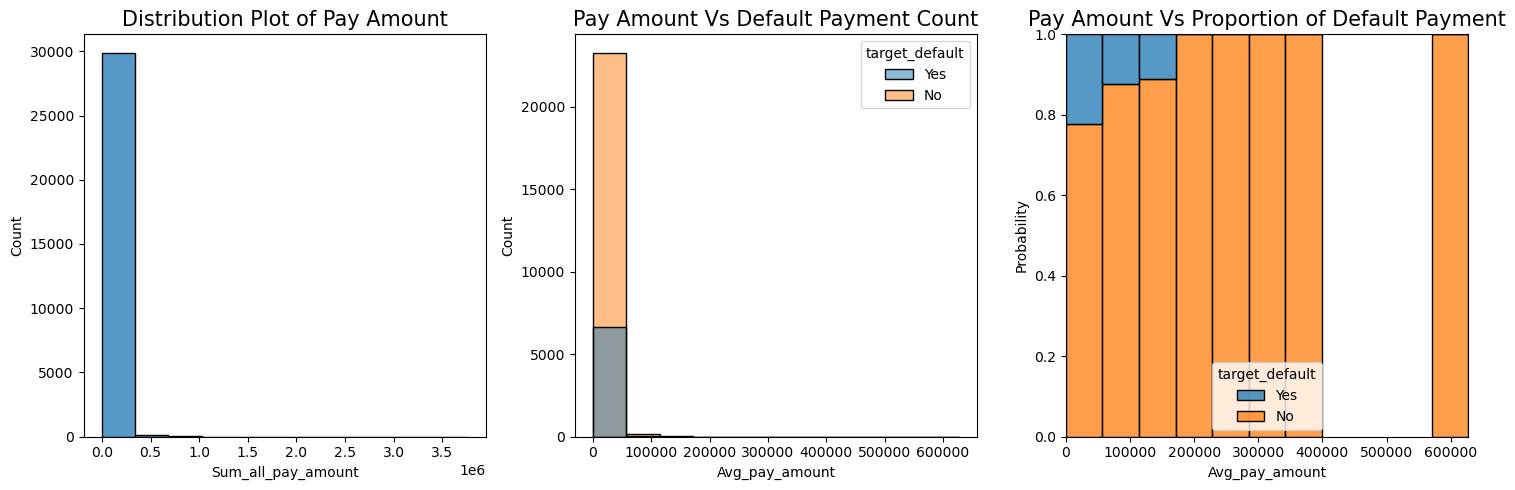

In [88]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

# Distribution analysis of Pay Amount
hist = sns.histplot(df['Sum_all_pay_amount'],bins=11, ax=ax[0])
hist.set_title('Distribution Plot of Pay Amount', size=15)

# Bi-variate analysis
# Pay amount Vs Default Payment Count
hist = sns.histplot(data=df, x='Avg_pay_amount', hue='target_default',bins=11, ax=ax[1])
hist.set_title('Pay Amount Vs Default Payment Count', size=15)

# Bi-variate analysis
# Pay amount Vs Proportion of Default Payment
hist = sns.histplot(data=df, x='Avg_pay_amount', hue='target_default', bins=11, multiple='fill', stat='probability', ax=ax[2])
hist.set_title('Pay Amount Vs Proportion of Default Payment', size=15)

plt.tight_layout()
plt.show()

Observation:

In all the pay amounts most of the paid amount is up to 50000.
We have seen bill amounts up to 2 lacks but the pay amount is not averaged up to 2 lakh which is obvious because default payment occurs when the customer does not pay the credit card bill.
If we compare the pay amount with the default payment, the proportion of default payment decreases with the rise in the payment amount.

## 5.3 Skewness


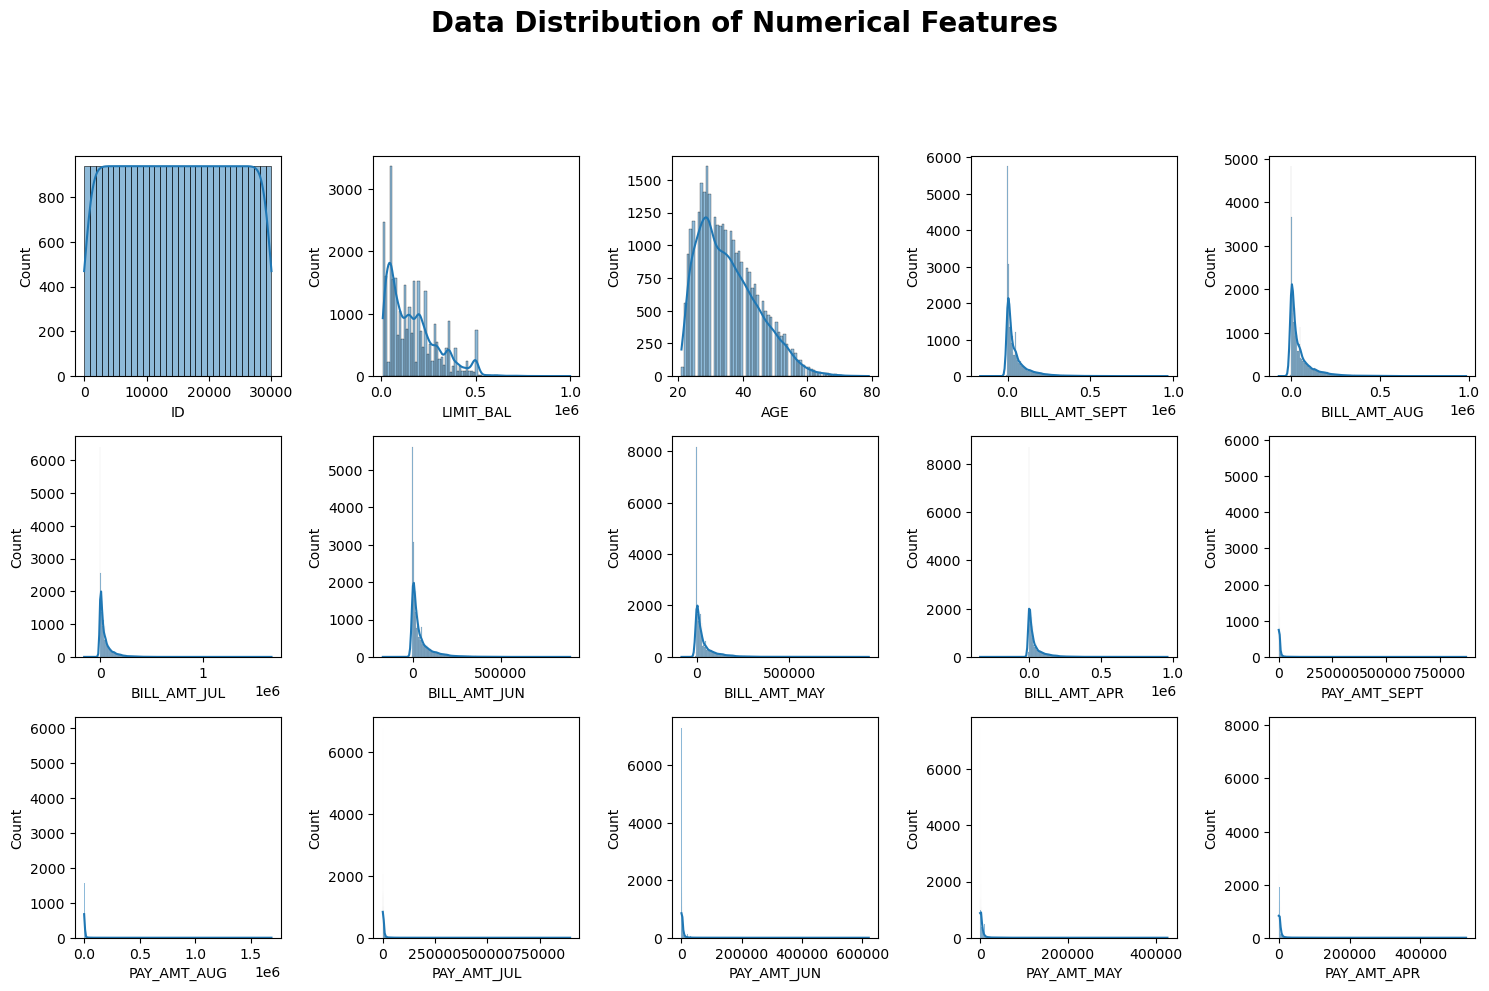

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns grid of subplots

    # Use sns.histplot instead of deprecated sns.distplot
    sns.histplot(df[col], kde=True)  

    plt.xlabel(col)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to not overlap with suptitle

plt.show()


## Observation:

For numerical features, we can see that the majority of distributions are right-skewed. The distribution of all the bill amounts and pay amounts is highly skewed to the right. It demonstrates that these columns have many outliers.
Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we will get rid of outliers, and then we check to see if we need to use the transformation technique again.

## 5. Data Cleaning

**What is data cleaning?**


Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

1. NO Duplicates
2. NO null values
3. No missing values

so further Things are done 
Treating outliers


## 5.4 Treating Outliers

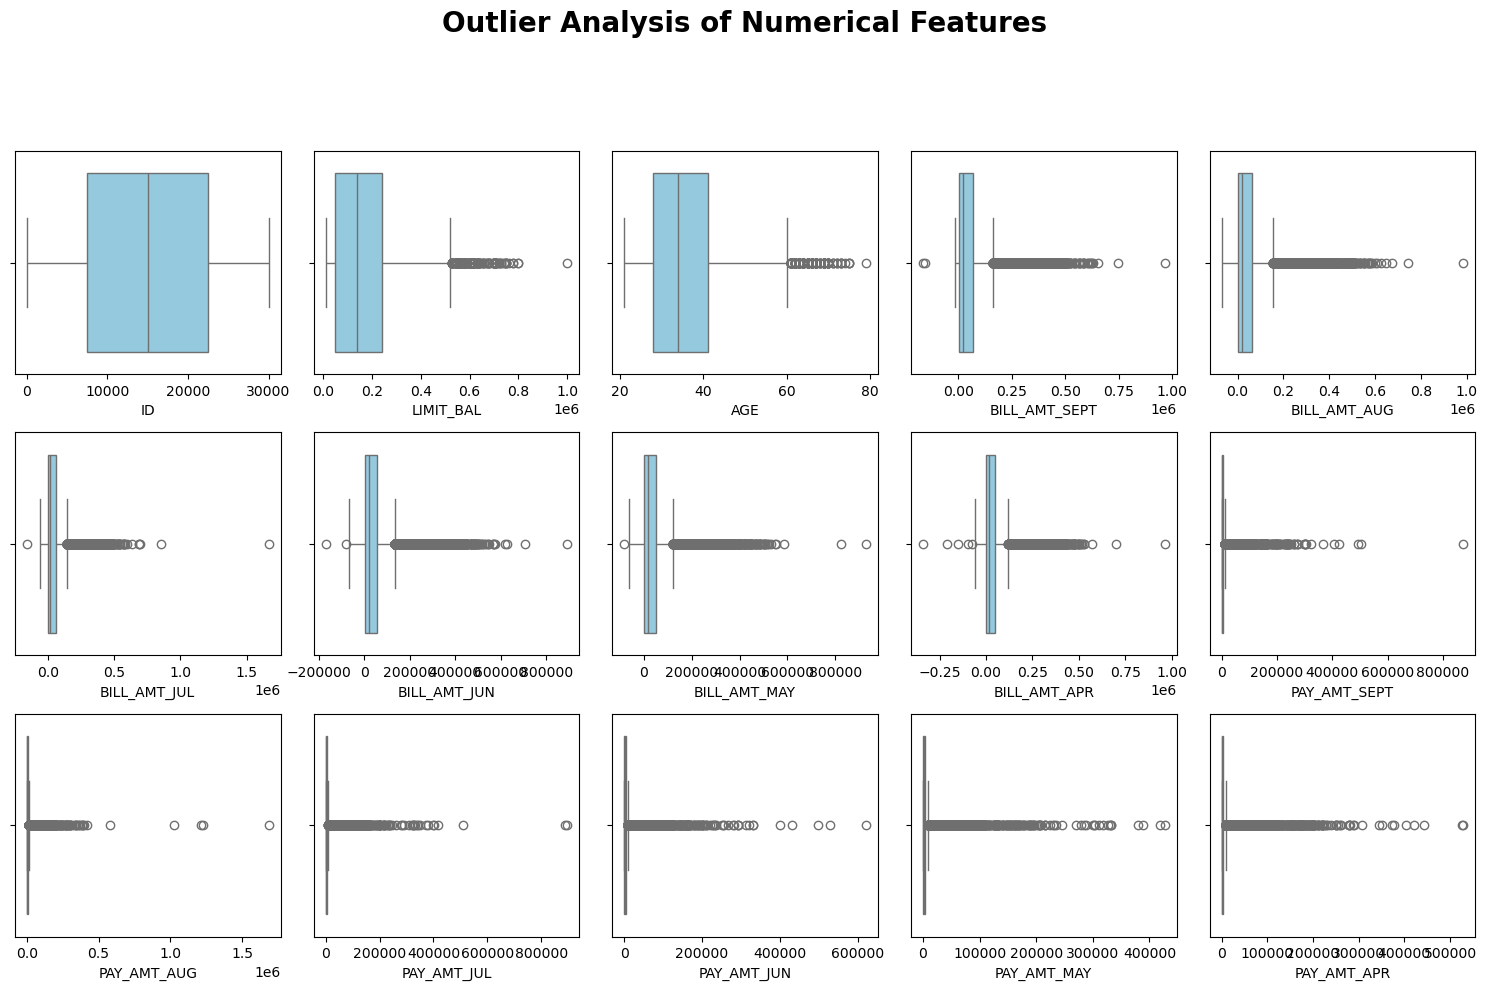

In [96]:
plt.figure(figsize=(15, 12))
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns subplot grid
    
    # Boxplot for the column, horizontal orientation recommended for readability
    sns.boxplot(x=df[col], color='skyblue')
    
    plt.xlabel(col)
    
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the suptitle
plt.show()


## Observation:

Outliers are visible in the all the bill amounts features and all the pay amounts features, and 'LIMIT_BAL' columns.
Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [98]:
def clip_outliers(df):
    df = dataframe.copy()
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    return df


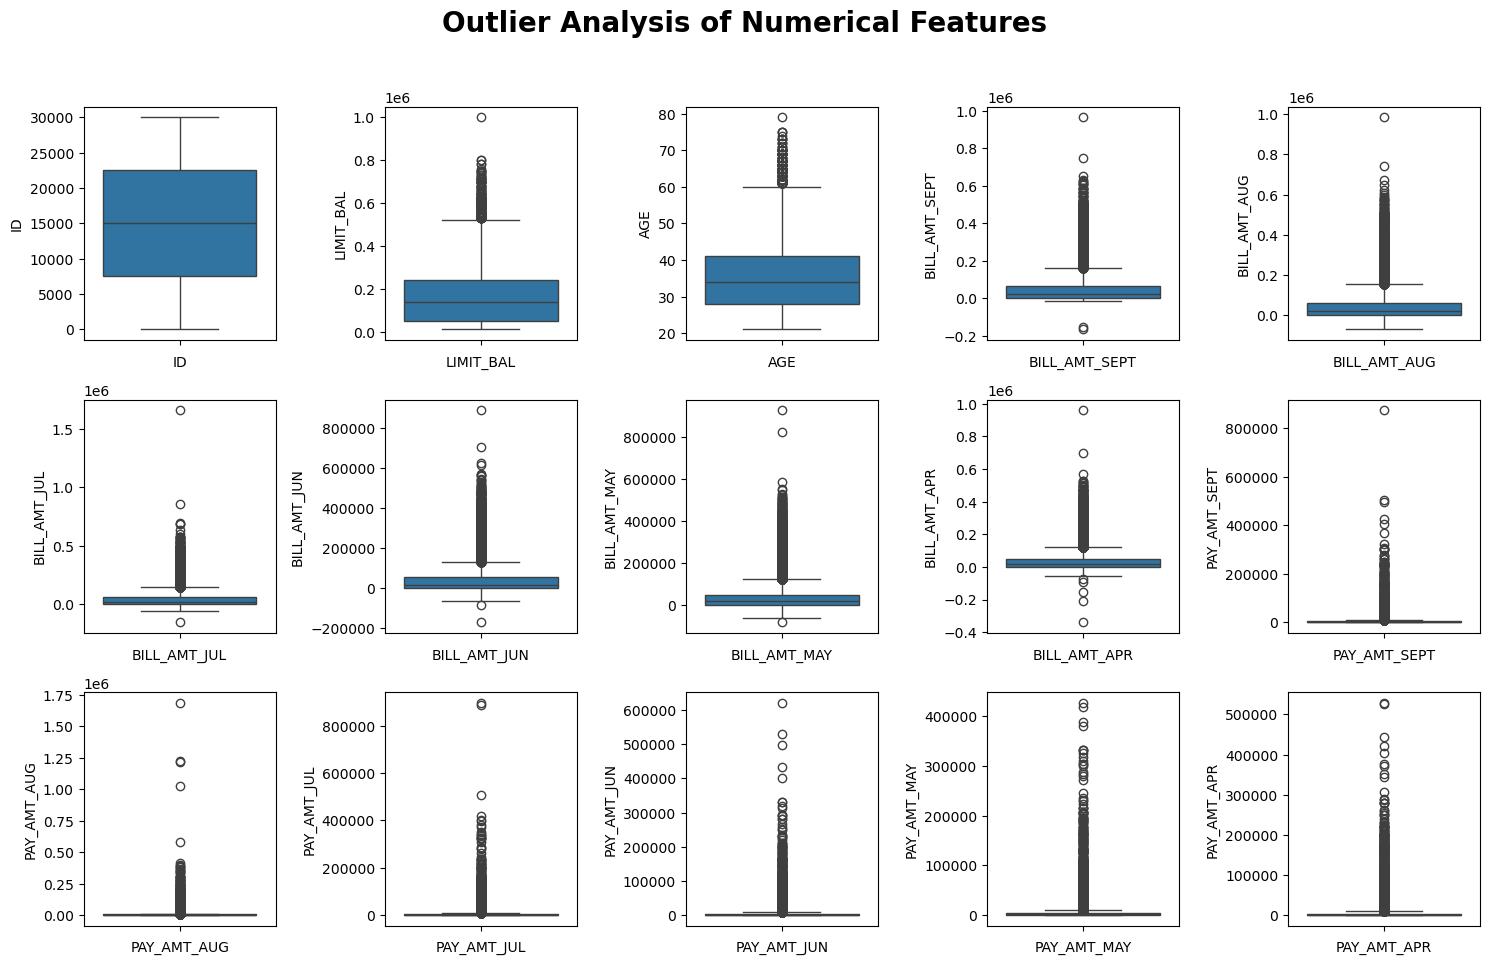

In [99]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

# checking for distribution after treating outliers.

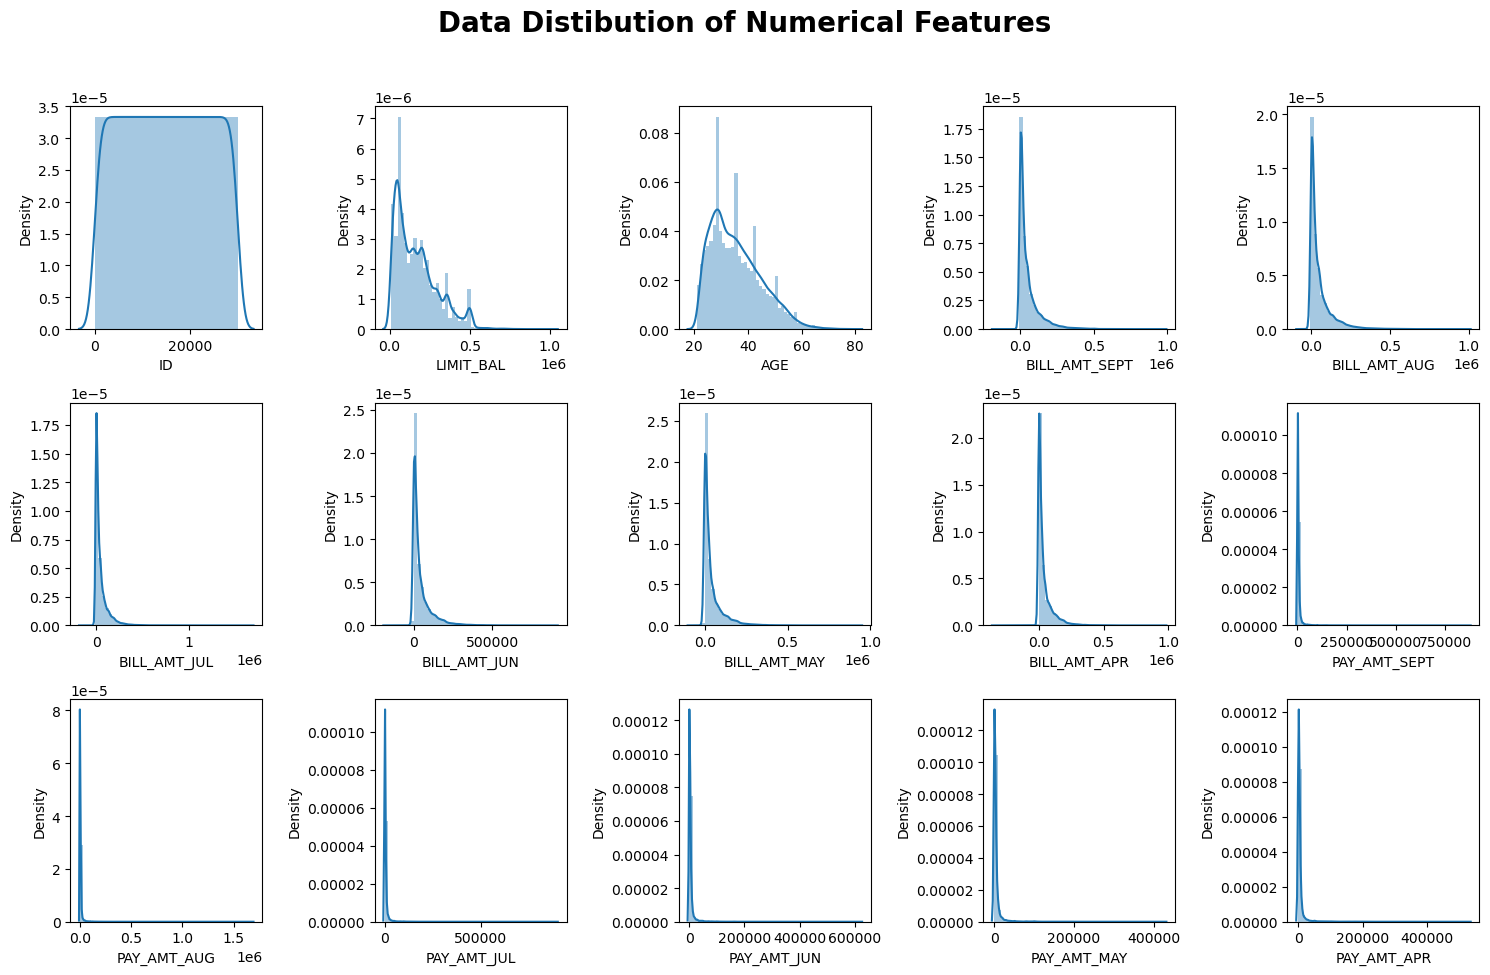

In [101]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(df[col])  
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    
     


We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

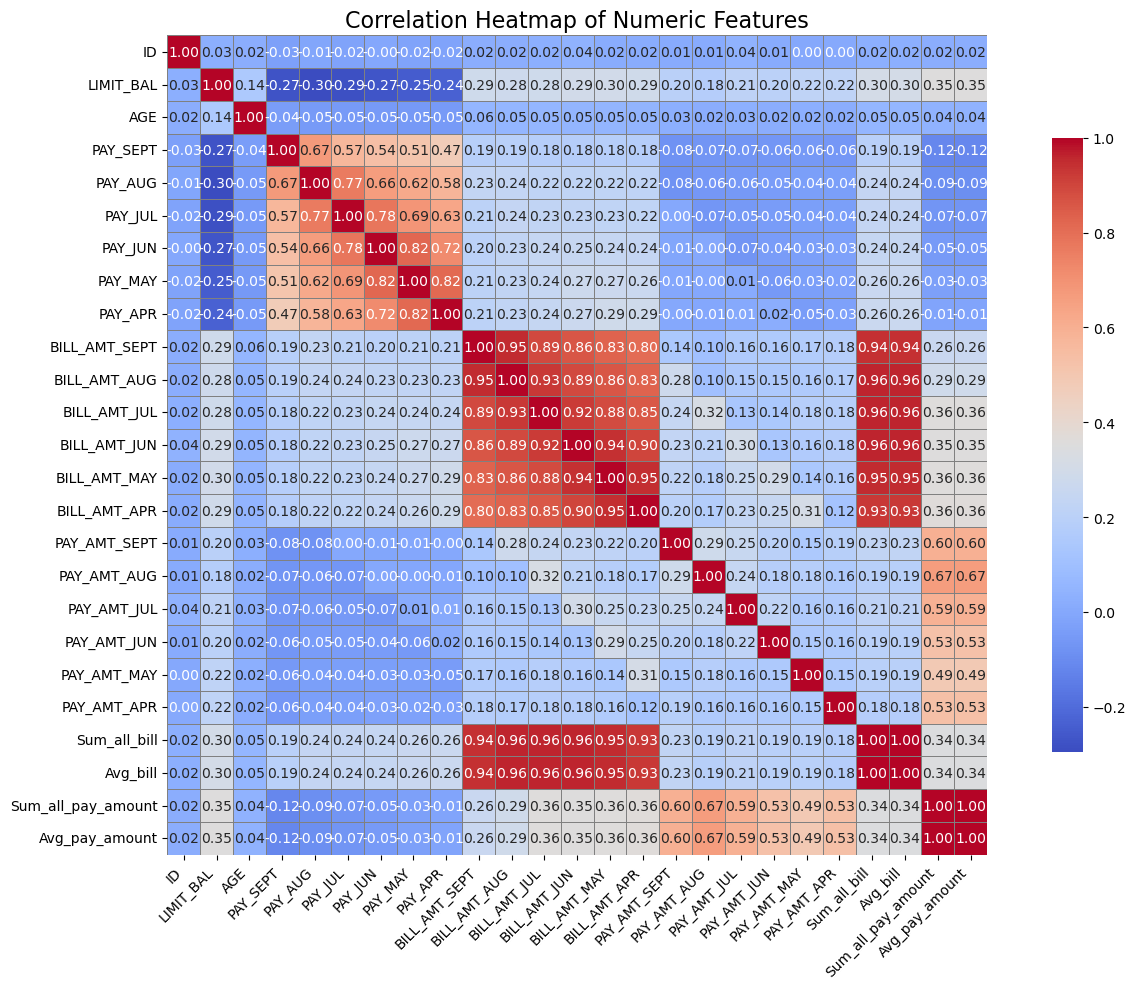

In [103]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={'shrink': .75}, linewidths=0.5, linecolor='gray')

plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Correlation 

#### highly correlated numerical features (correlation > threshold, default 0.8)
#####  to help with feature selection and avoid multicollinearity in machine learning models.

In [105]:
#  highly correlated numerical features (correlation > threshold, default 0.8)
# to help with feature selection and avoid multicollinearity in machine learning models.

def find_correlated_features(dataset, threshold=0.8):
    """
    Returns a set of feature names that are highly correlated (correlation > threshold).
    Only numerical features are considered.
    """
    # Selecting numerical columns only
    numeric_data = dataset.select_dtypes(include=['number'])

    # Correlation matrix
    corr_matrix = numeric_data.corr()

    # Set to store correlated columns
    correlated_features = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    return correlated_features


In [106]:
high_corr_features = find_correlated_features(df, threshold=0.75)
print("Highly correlated features to consider removing:")
print(high_corr_features)


Highly correlated features to consider removing:
{'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_MAY', 'PAY_APR', 'Sum_all_bill', 'PAY_JUN', 'Avg_bill', 'Avg_pay_amount', 'BILL_AMT_APR', 'PAY_MAY', 'PAY_JUL'}


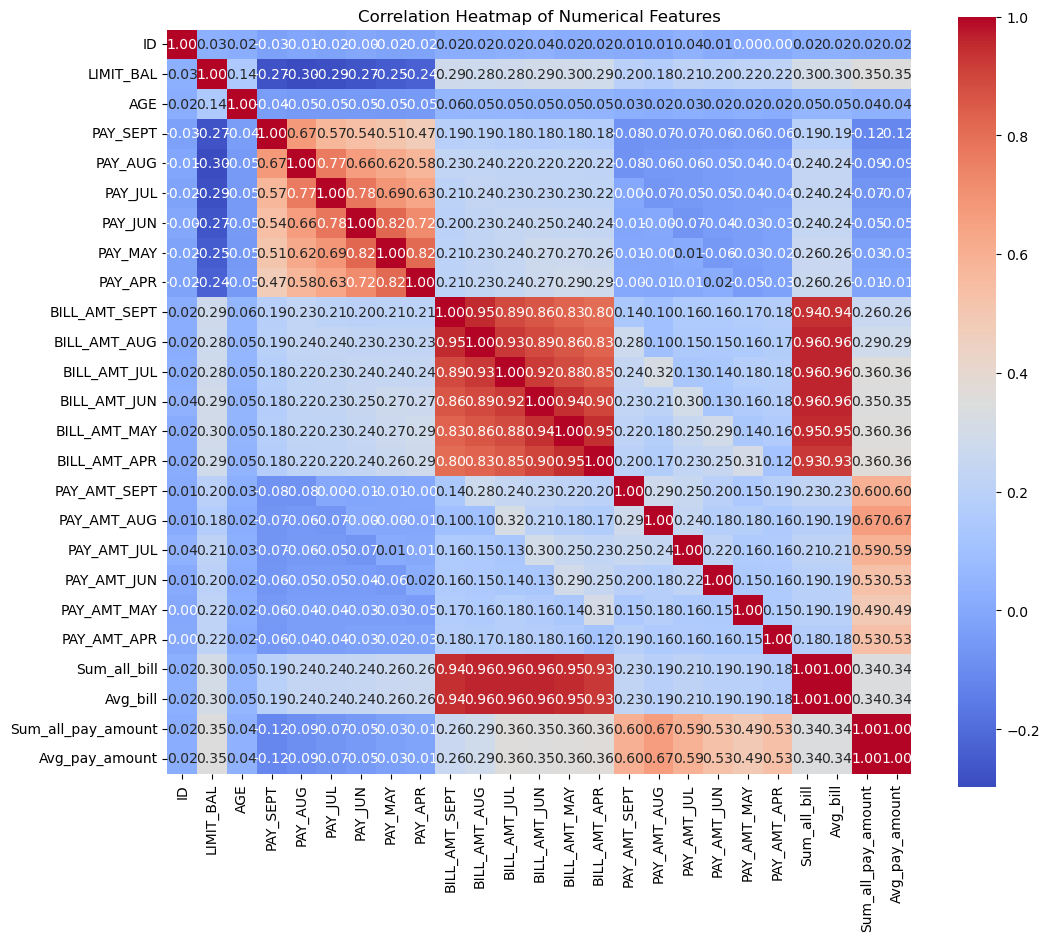

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [108]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target_default,Sum_all_bill,Avg_bill,Sum_all_pay_amount,Avg_pay_amount
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,689,0,0,0,0,Yes,7704,1284.000000,689,114.833333
1,2,120000,Female,University,Single,26,-1,2,0,0,...,1000,1000,1000,0,2000,Yes,17077,2846.166667,5000,833.333333
2,3,90000,Female,University,Single,34,0,0,0,0,...,1500,1000,1000,1000,5000,No,101653,16942.166667,11018,1836.333333
3,4,50000,Female,University,Married,37,0,0,0,0,...,2019,1200,1100,1069,1000,No,231334,38555.666667,8388,1398.000000
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,36681,10000,9000,689,679,No,109339,18223.166667,59049,9841.500000


In [109]:
df.shape

(30000, 29)

In [110]:
df['target_default']

0        Yes
1        Yes
2         No
3         No
4         No
        ... 
29995     No
29996     No
29997    Yes
29998    Yes
29999    Yes
Name: target_default, Length: 30000, dtype: object

## 6. Feature Engineering
Feature engineering refers to the process of improving raw data by creating new input variables or modifying existing ones to enhance the performance of a machine learning model. This can involve generating new features, transforming current ones, or selecting only the most significant attributes from the data. The main aim is to make the data more meaningful and suitable for the model to learn from. Since the quality and relevance of input features directly affect the model’s effectiveness, feature engineering is a key step in building successful machine learning systems.



## 6.1 Feature Manipulation

In [113]:
# copying this data to protect the work done till now 
df_feature = df.copy()
     

In [114]:
numerical_features = []  # List to store numerical features
categorical_features = []  # List to store categorical features

# splitting features into numeric and categoric.
'''
If feature has more than 15 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df_feature.columns:  # Loop through each column in the DataFrame
  if df_feature[col].nunique() > 15:  # Check if the column has more than 15 unique values
    numerical_features.append(col)   # If yes, treat as numerical and add to list
  else:
    categorical_features.append(col)  # Else, treat as categorical and add to list

print(f'Numerical Features : {numerical_features}')  # Print numerical features
print(f'Categorical Features : {categorical_features}')  # Print categorical features


Numerical Features : ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Sum_all_bill', 'Avg_bill', 'Sum_all_pay_amount', 'Avg_pay_amount']
Categorical Features : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'target_default']


## 6.1.2 BILL_AMT

In a credit card dataset, the bill amount (BILL_AMT) shows how much money the customer owes to the bank, so it should always be a positive number. If we see negative values in this column, it usually means there was a mistake while entering the data or some other issue. That's why we are removing all rows where the bill amount is negative.

We removed all the rows from the DataFrame where the value of BILL_AMT1 was negative.


We removed all the rows from the DataFrame where the value of BILL_AMT1 was negative.











6.1.2 EDUCATION


The education column has a lot of unknown sub-categories so combining them into one sub-category.

In [119]:

# Checking the value counts of each sub-category of EDUCATION
df_feature['EDUCATION'].value_counts()
     

EDUCATION
University         14030
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64

In [120]:
# Replacing unknown or invalid education categories (0, 5, 6) with a single category '4' to treat them as 'Others'
df_feature['EDUCATION'] = df_feature['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)


In [121]:
# Cheking the result
df_feature['EDUCATION'].value_counts()
     

EDUCATION
University         14030
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64

# 1: Data Copy and Encoding

#### 6.3 Encoding

### One-Hot Encoding (Nominal features)

### Label Encoding (Ordinal features)


df_encoded['target_default'] = df_encoded['target_default'].map({'Yes': 1, 'No': 0}).astype(int)


In [125]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df_encoded = df.copy()

# One-Hot Encoding for nominal features
df_encoded = pd.get_dummies(df_encoded, columns=['SEX', 'MARRIAGE'], drop_first=True)

# Label Encoding for ordinal feature
le = LabelEncoder()
df_encoded['EDUCATION'] = le.fit_transform(df_encoded['EDUCATION'])

#    Binary Mapping

# Encode 'target_default' column: Yes → 1, No → 0
df_encoded['target_default'] = df_encoded['target_default'].map({'Yes': 1, 'No': 0}).astype(int)



####  Convert Boolean Columns to Integer

In [127]:
# Select all boolean columns
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convert them to int
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [128]:
print(df_encoded)


          ID  LIMIT_BAL  EDUCATION  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  \
0          1      20000          3   24         2        2       -1       -1   
1          2     120000          3   26        -1        2        0        0   
2          3      90000          3   34         0        0        0        0   
3          4      50000          3   37         0        0        0        0   
4          5      50000          3   57        -1        0       -1        0   
...      ...        ...        ...  ...       ...      ...      ...      ...   
29995  29996     220000          1   39         0        0        0        0   
29996  29997     150000          1   43        -1       -1       -1       -1   
29997  29998      30000          3   37         4        3        2       -1   
29998  29999      80000          1   41         1       -1        0        0   
29999  30000      50000          3   46         0        0        0        0   

       PAY_MAY  PAY_APR  ...  PAY_AMT_M

## 7.4 Feature Selection


Feature selection is a technique in machine learning where you select a subset of the most important features from a larger set of features to use as inputs for a model. The goal of feature selection is to reduce the number of features used in the model, while retaining the most important and relevant information from the data.

### Dropping unnecessary columns

In [132]:
df_encoded.columns

Index(['ID', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL',
       'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'target_default', 'Sum_all_bill',
       'Avg_bill', 'Sum_all_pay_amount', 'Avg_pay_amount', 'SEX_Male',
       'MARRIAGE_Others', 'MARRIAGE_Single'],
      dtype='object')

In [133]:
# dropping the ID column
df_encoded.drop('ID',axis = 1, inplace = True)

# Dropping Sum_all_pay_amount because it was created for EDA 
df_encoded.drop(['Sum_all_pay_amount', 'Avg_pay_amount', 'Sum_all_bill', 'Avg_bill'],axis=1, inplace=True)

In [134]:
df_encoded.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,target_default,SEX_Male,MARRIAGE_Others,MARRIAGE_Single
0,20000,3,24,2,2,-1,-1,-2,-2,3913,...,0,689,0,0,0,0,1,0,0,0
1,120000,3,26,-1,2,0,0,0,2,2682,...,0,1000,1000,1000,0,2000,1,0,0,1
2,90000,3,34,0,0,0,0,0,0,29239,...,1518,1500,1000,1000,1000,5000,0,0,0,1
3,50000,3,37,0,0,0,0,0,0,46990,...,2000,2019,1200,1100,1069,1000,0,0,0,0
4,50000,3,57,-1,0,-1,0,0,0,8617,...,2000,36681,10000,9000,689,679,0,1,0,0


# 7.5 Handling Imbalance


### Class Distribution Visualization  target

target_default
0    23364
1     6636
Name: count, dtype: int64
 


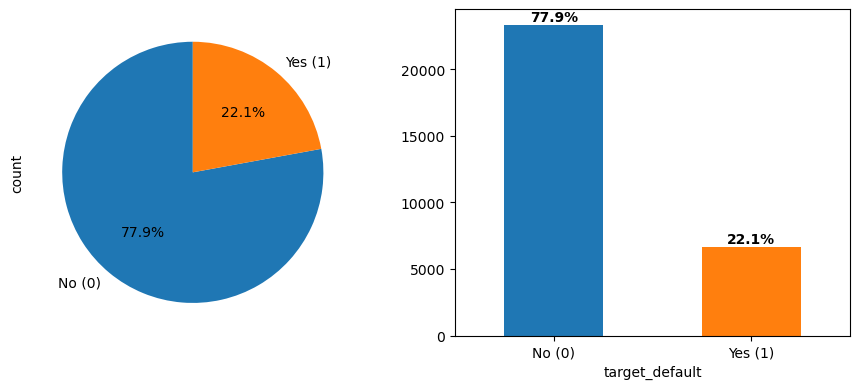

In [137]:
# Dependant Column Value Counts
print(df_encoded.target_default.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Pie chart
df_encoded['target_default'].value_counts().plot(
    kind='pie', 
    autopct="%1.1f%%", 
    startangle=90, 
    ax=ax[0], 
    labels=['No (0)', 'Yes (1)'],
    colors=['tab:blue', 'tab:orange']
)

# Bar chart with colors
value_counts = df_encoded['target_default'].value_counts().sort_index()
colors = ['tab:blue', 'tab:orange']  # 0 → blue, 1 → orange
bars = value_counts.plot(kind='bar', ax=ax[1], color=colors)

# Adding percentage labels on top of bars
total = value_counts.sum()
for i, val in enumerate(value_counts):
    percentage = f'{100 * val / total:.1f}%'
    ax[1].text(i, val + total*0.01, percentage, ha='center', fontweight='bold')

ax[1].set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)
plt.tight_layout()
plt.show()




In [138]:
# Count values
value_counts = df_encoded['target_default'].value_counts().sort_index()
total = value_counts.sum()

# Calculate % for each class
percent_0 = 100 * value_counts[0] / total
percent_1 = 100 * value_counts[1] / total

# Difference
percent_diff = abs(percent_1 - percent_0)

print(f"Percentage of class 0: {percent_0:.2f}%")
print(f"Percentage of class 1: {percent_1:.2f}%")
print(f"Gap between class 0 and 1: {percent_diff:.2f}%")


Percentage of class 0: 77.88%
Percentage of class 1: 22.12%
Gap between class 0 and 1: 55.76%


In [139]:
# Step 1: Import Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter



##  2: Split Features (X) and Target (y)

In [141]:
# Step 2: Separate X and y from the original dataset
X = df_encoded.drop(columns='target_default')     # independent features
y = df_encoded['target_default']                  # target variable

## Step 3: Train-Test Split (with Stratify)

In [143]:
# Step 3: Split the data into training and testing sets (80% train, 20% test)

# 'stratify=y' ensures the class distribution remains same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display class distribution before applying SMOTE
# Helps us verify the imbalance in the train and test sets
print(f"Before SMOTE:\nTrain class distribution: {Counter(y_train)}")
print(f"Test class distribution: {Counter(y_test)}")


Before SMOTE:
Train class distribution: Counter({0: 18691, 1: 5309})
Test class distribution: Counter({0: 4673, 1: 1327})


## Apply SMOTE on Training Data

In [145]:
! pip uninstall imbalanced-learn -y



Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0


In [146]:
! pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)


In [147]:
pip install --upgrade imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\admin\anaconda3\lib\site-packages (0.13.0)
  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2



  You can safely remove it manually.


In [148]:
! pip install scikit-learn==1.3.2

  Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-win_amd64.whl (9.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.3.2 which is incompatible.


In [149]:
! pip install imbalanced-learn==0.11.0

  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [150]:
import sklearn


In [151]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train already exist and are valid
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(f"After SMOTE:\nTrain class distribution: {Counter(y_train_sm)}")


After SMOTE:
Train class distribution: Counter({0: 18691, 1: 18691})


In [152]:
# Step 4: Apply SMOTE only on the training data to handle class imbalance
# SMOTE generates synthetic samples for the minority class in X_train
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Display the new class distribution after applying SMOTE
# This confirms that training data is now balanced
print(f"\nAfter SMOTE:\nTrain class distribution: {Counter(y_train_sm)}")




After SMOTE:
Train class distribution: Counter({0: 18691, 1: 18691})


Note:
Never apply SMOTE before splitting data.

Never fit scaler on the whole dataset — only fit on training data

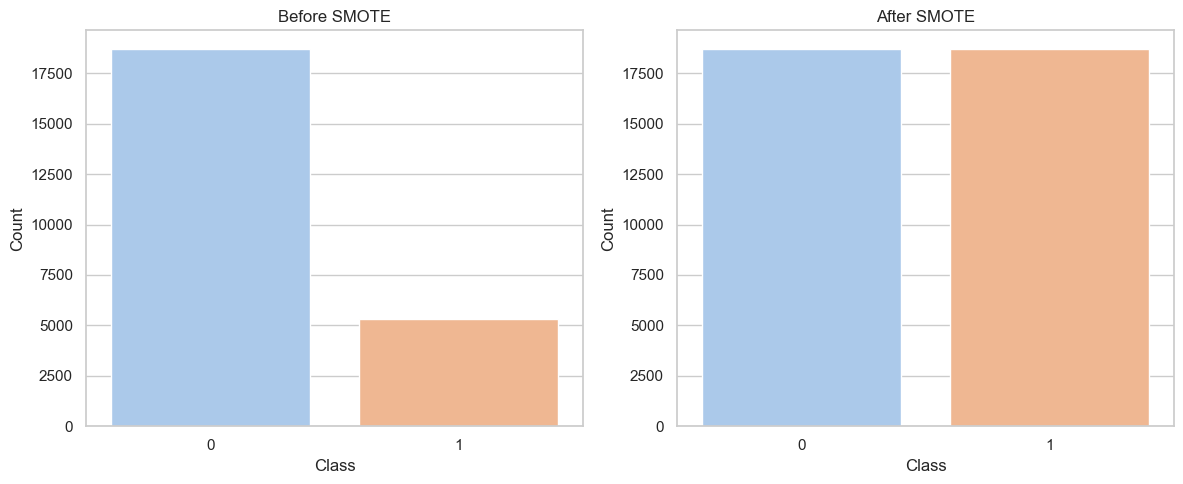

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create subplots for before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot before SMOTE
sns.countplot(x=y_train, ax=ax[0], palette='pastel')
ax[0].set_title("Before SMOTE")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Count")

# Plot after SMOTE
sns.countplot(x=y_train_sm, ax=ax[1], palette='pastel')
ax[1].set_title("After SMOTE")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Count")

# Show plot
plt.tight_layout()
plt.show()


In [155]:
# Step 5: Scale the data using StandardScaler to bring all features to the same scale
scaler = StandardScaler()

# Fit the scaler only on SMOTE-resampled training data to avoid data leakage
# Then transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_sm)  # Fit & transform on training set
X_test_scaled = scaler.transform(X_test)           # Only transform on test set

# ✅ Now X_train_scaled, X_test_scaled, y_train_sm, and y_test are ready for model training

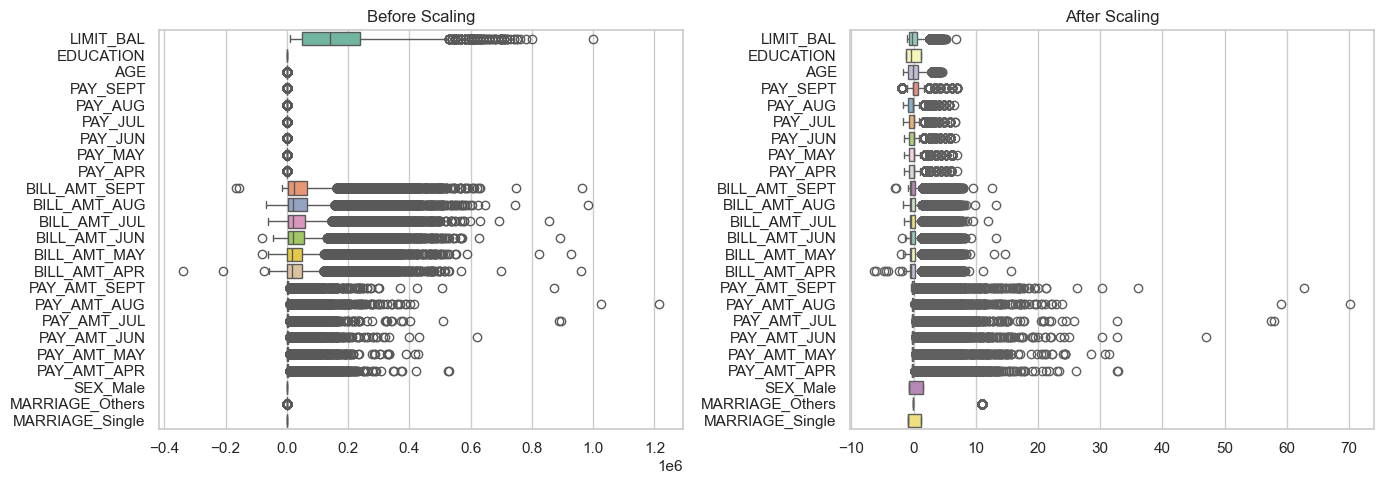

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert arrays back to DataFrame (optional, for visualization)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Plot before and after scaling
plt.figure(figsize=(14, 5))

# Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_df, orient='h', palette='Set2')
plt.title("Before Scaling")

# After scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled_df, orient='h', palette='Set3')
plt.title("After Scaling")

plt.tight_layout()
plt.show()


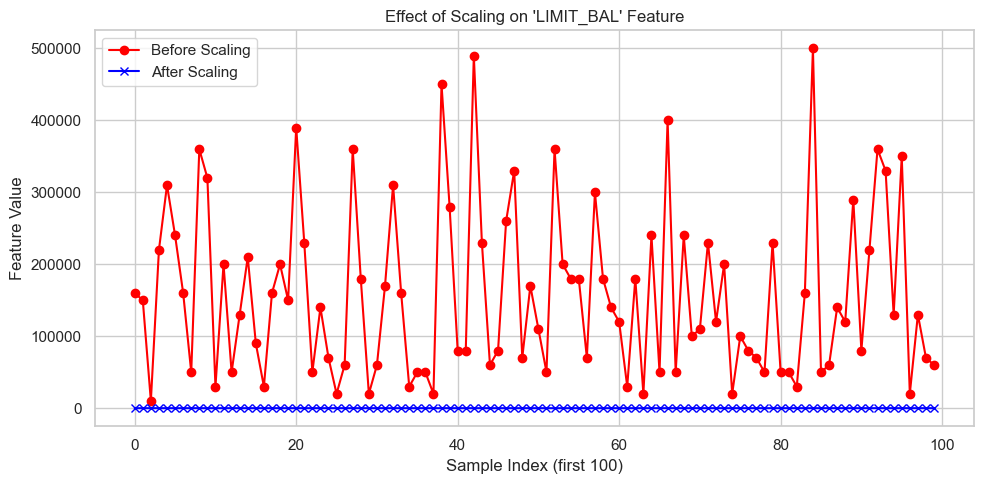

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Choose the feature name
feature_name = 'LIMIT_BAL'

# Get the index of the feature
feature_idx = list(X.columns).index(feature_name)

# Convert X_train and X_train_scaled to NumPy arrays if not already
X_train_array = np.array(X_train)
X_train_scaled_array = np.array(X_train_scaled)

# Plot original vs scaled values for the selected feature
plt.figure(figsize=(10, 5))

plt.plot(X_train_array[:100, feature_idx], label='Before Scaling', color='red', marker='o')
plt.plot(X_train_scaled_array[:100, feature_idx], label='After Scaling', color='blue', marker='x')

plt.title(f"Effect of Scaling on '{feature_name}' Feature")
plt.xlabel("Sample Index (first 100)")
plt.ylabel("Feature Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [158]:
X_train.shape

(24000, 24)

In [159]:
X_test.shape

(6000, 24)


Great question! ✅ Since you’ve:

Encoded your data → df_encoded

Split into train-test (X_train, X_test, y_train, y_test)

Applied SMOTE on training data → X_train_sm, y_train_sm

Scaled both training and test features → X_train_scaled, X_test_scaled

| Dataset Name     | Used For         | Description                                            |
| ---------------- | ---------------- | ------------------------------------------------------ |
| `X_train_scaled` | ✅ Model training | Scaled, SMOTE-balanced training features               |
| `y_train_sm`     | ✅ Model training | Balanced target (after SMOTE)                          |
| `X_test_scaled`  | ✅ Model testing  | Scaled test features (original test set)               |
| `y_test`         | ✅ Model testing  | True labels for testing (unchanged from original data) |


In [162]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)


# Model Implementation

# 8.3 Evaluation Metrics Used

 8.3 Evaluation Metrics Used (For My Classification Model)
To evaluate the performance of my classification model (for example, predicting loan default or medical outcome), I used the following metrics — especially considering the class imbalance in the dataset.


1. Accuracy
Definition: Proportion of correct predictions out of total predictions.

Formula: (TP + TN) / (TP + FP + FN + TN)

When to Use: Only when the classes are balanced.

In My Case: Accuracy alone is not reliable, as my dataset is imbalanced. A high accuracy may still hide poor performance on the minority class.


 2. Confusion Matrix
What It Shows: Count of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

Why I Used It: It helps visualize model mistakes and is the base for calculating precision, recall, etc.

Usefulness: Crucial for understanding how well my model distinguishes between the positive and negative classes.


3. Precision
Definition: Out of all positive predictions, how many were truly positive.

Formula: TP / (TP + FP)

When to Use: When False Positives are costly (e.g., spam detection).

In My Case: Precision helps measure how accurate my positive predictions are.


    4. Recall (Sensitivity)
Definition: Out of all actual positives, how many the model correctly predicted.

Formula: TP / (TP + FN)

When to Use: When False Negatives are risky (e.g., medical diagnosis).

In My Case: Recall is important to ensure that the model captures as many actual positives as possible.

5. F1 Score
Definition: Harmonic mean of Precision and Recall.

Formula: 2 * (Precision * Recall) / (Precision + Recall)

When to Use: When both Precision and Recall matter and there's class imbalance.

In My Case: F1 Score is my main metric, balancing both false positives and false negatives.


6. AUC-ROC Curve
Definition: AUC is the area under the ROC Curve which plots TPR vs FPR at various thresholds.

Value Range: 0.0 to 1.0 — higher AUC means better class separation.

In My Case: AUC helps me evaluate the probabilistic ability of the model to separate the classes, especially in imbalanced datasets.

***Since my problem involved imbalanced classes, I relied more on:***

**F1 Score, Recall, and AUC**
**rather than plain Accuracy — to get a more realistic picture of model performance.**



# 8.4 Model Training

# 9. Model Implementation

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [170]:
#fitting data into Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_scaled, y_train_sm)


LogisticRegression(max_iter=10000)

In [171]:
# Predict on test data
y_pred_logi = lr_model.predict(X_test_scaled)

# Predict on train data
y_train_pred_logi = lr_model.predict(X_train_scaled)


In [172]:
# Predict on test data
y_pred_logi = lr_model.predict(X_test_scaled)

# Predict on train data
y_train_pred_logi = lr_model.predict(X_train_scaled)

 Explanation:

X_train_scaled → scaled training features (after SMOTE if applied)

y_train_sm → balanced target labels (after SMOTE)

X_test_scaled → scaled test features

y_pred_logi → predicted test labels

y_train_pred_logi → predicted train labels

In [174]:
# 📌 Import necessary evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 🧠 Logistic Regression - Score Evaluation

# Accuracy on training data
train_accuracy_logi = round(accuracy_score(y_train_sm, y_train_pred_logi), 3)

# Accuracy on test data
accuracy_logi = round(accuracy_score(y_test, y_pred_logi), 3)

# Precision on test data
precision_score_logi = round(precision_score(y_test, y_pred_logi), 3)

# Recall on test data
recall_score_logi = round(recall_score(y_test, y_pred_logi), 3)

# F1 score on test data
f1_score_logi = round(f1_score(y_test, y_pred_logi), 3)

# ROC AUC score on test data
roc_score_logi = round(roc_auc_score(y_test, y_pred_logi), 3)

# 📊 Print all evaluation scores
print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The F1 score on test data is ", f1_score_logi)
print("The ROC AUC score on test data is ", roc_score_logi)


The accuracy on train data is  0.704
The accuracy on test data is  0.674
The precision on test data is  0.355
The recall on test data is  0.579
The F1 score on test data is  0.44
The ROC AUC score on test data is  0.64


Confusion Matrix:
 [[3275 1398]
 [ 559  768]]


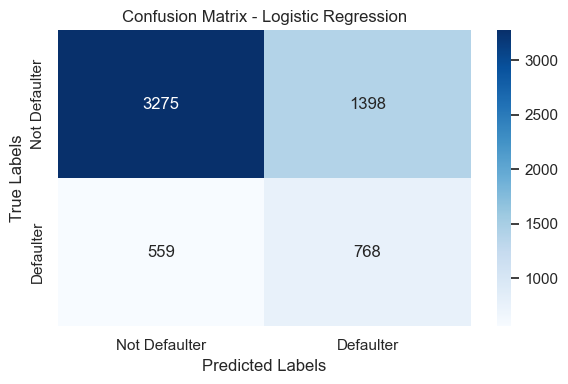

In [175]:
# ✅ Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Define labels
labels = ['Not Defaulter', 'Defaulter']

# 🧮 Get the confusion matrix for Logistic Regression
cm_logi = confusion_matrix(y_test, y_pred_logi)
print("Confusion Matrix:\n", cm_logi)

# 📊 Plot the confusion matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm_logi, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# 📝 Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Logistic Regression')

# ✅ Show plot
plt.tight_layout()
plt.show()


# Decision tree classification

In [177]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [178]:


# 🧠 Initialize and fit the Decision Tree Classifier on scaled & SMOTE-balanced training data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train_sm)


DecisionTreeClassifier(random_state=42)

In [179]:
# 🔮 Predict class labels using the trained Decision Tree model

# Prediction on test data
y_pred_dtc = dtc.predict(X_test_scaled)

# Prediction on train data
y_train_pred_dtc = dtc.predict(X_train_scaled)


In [180]:
# 📌 Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Evaluation scores
train_accuracy_dtc = round(accuracy_score(y_train_sm, y_train_pred_dtc), 3)
test_accuracy_dtc = round(accuracy_score(y_test, y_pred_dtc), 3)
precision_dtc = round(precision_score(y_test, y_pred_dtc), 3)
recall_dtc = round(recall_score(y_test, y_pred_dtc), 3)
f1_dtc = round(f1_score(y_test, y_pred_dtc), 3)
roc_auc_dtc = round(roc_auc_score(y_test, y_pred_dtc), 3)


In [181]:
# 🖨️ Print results
print("📌 Decision Tree Evaluation Results:")
print("Train Accuracy       :", train_accuracy_dtc)
print("Test Accuracy        :", test_accuracy_dtc)
print("Precision (Test)     :", precision_dtc)
print("Recall (Test)        :", recall_dtc)
print("F1 Score (Test)      :", f1_dtc)
print("ROC AUC Score (Test) :", roc_auc_dtc)

📌 Decision Tree Evaluation Results:
Train Accuracy       : 0.999
Test Accuracy        : 0.692
Precision (Test)     : 0.355
Recall (Test)        : 0.481
F1 Score (Test)      : 0.409
ROC AUC Score (Test) : 0.616



Confusion Matrix:
 [[3515 1158]
 [ 689  638]]


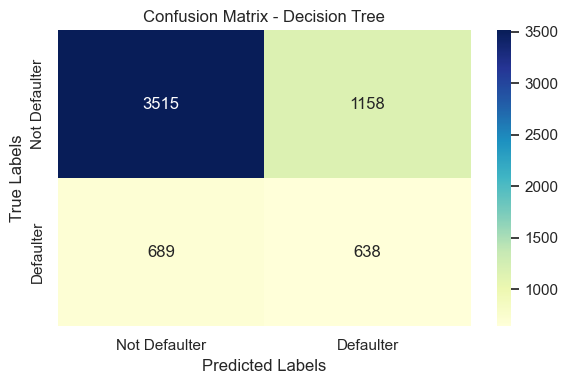

In [182]:
# 🧮 Confusion Matrix
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("\nConfusion Matrix:\n", cm_dtc)

# 📊 Plot Confusion Matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)

# 📝 Axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Decision Tree')

# ✅ Show plot
plt.tight_layout()
plt.show()


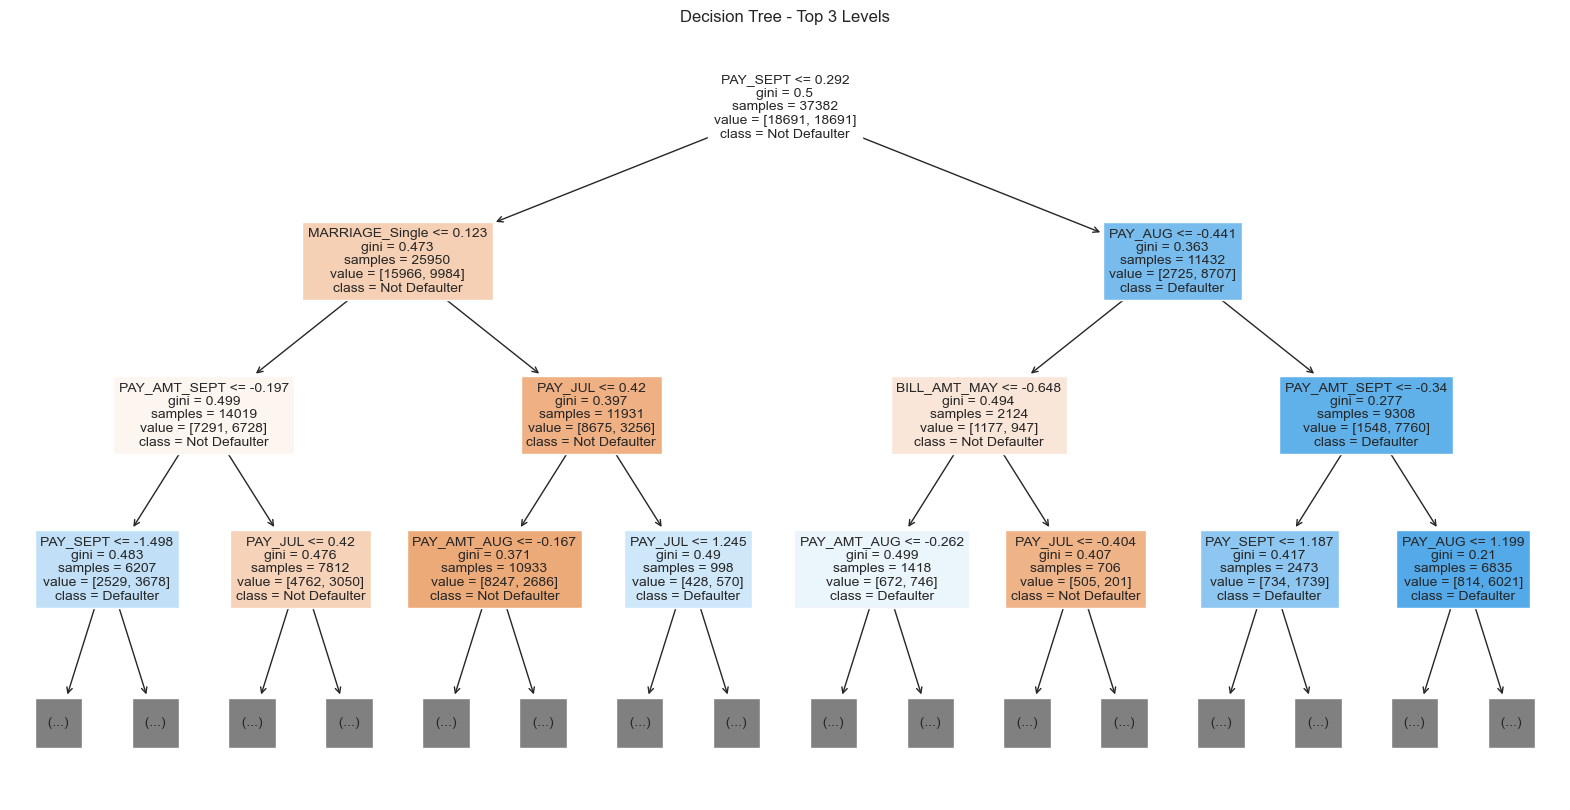

In [183]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ✅ Get feature names from original X_train (before scaling)
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# 📈 Plot the decision tree (top 3 levels only for readability)
plt.figure(figsize=(20, 10))
plot_tree(dtc, 
          filled=True,
          feature_names=feature_names,
          class_names=['Not Defaulter', 'Defaulter'],
          max_depth=3,  # Limit tree depth to keep it readable
          fontsize=10)

plt.title("Decision Tree - Top 3 Levels")
plt.show()


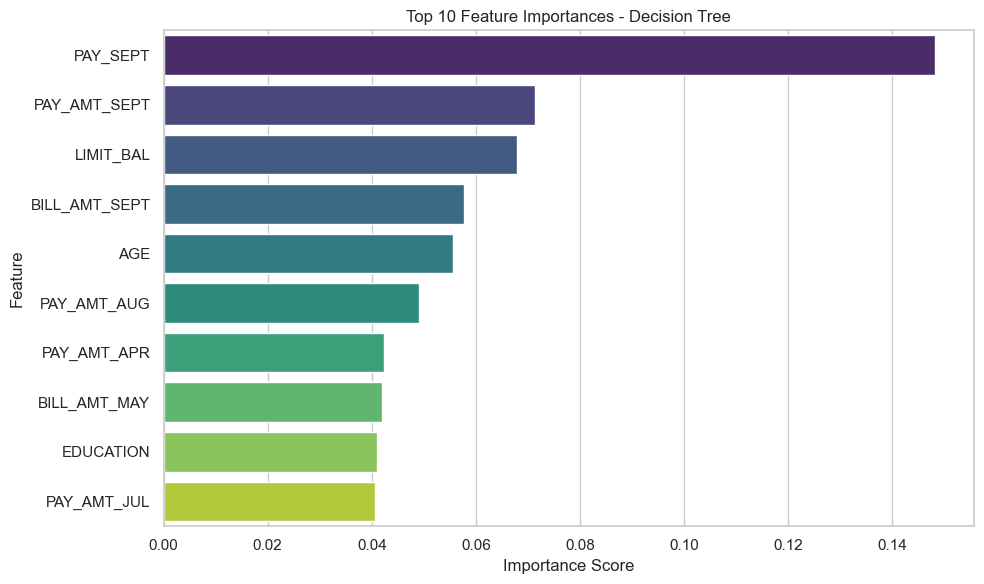

In [184]:
# 📌 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Use original feature names (from X_train before scaling)
feature_names = X_train.columns  # Make sure X_train is a DataFrame

# 🎯 Get feature importance scores from the Decision Tree model
importances = dtc.feature_importances_

# 📊 Create a DataFrame to organize and sort feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 📈 Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='viridis')

# 📋 Add labels and title
plt.title('Top 10 Feature Importances - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# ✅ Show the plot
plt.show()


# Random Forest Classification


In [186]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [187]:
# 📌 Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# ✅ Initialize and train the model on scaled + SMOTE-balanced data
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train_scaled, y_train_sm)


RandomForestClassifier(n_estimators=50, random_state=42)

Explanation:

X_train_scaled: Scaled feature set

y_train_sm: Balanced target labels (after SMOTE)

n_estimators=50: Number of trees in the forest

random_state=42: Ensures reproducibility

In [189]:
# 🔮 Predict labels using Random Forest model

# Test set predictions
y_pred_rfc = rfc.predict(X_test_scaled)

# Train set predictions
y_train_pred_rfc = rfc.predict(X_train_scaled)


In [190]:
# 📌 Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 🎯 Calculate metrics
train_accuracy_rfc = round(accuracy_score(y_train_sm, y_train_pred_rfc), 3)
test_accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc), 3)
precision_rfc = round(precision_score(y_test, y_pred_rfc), 3)
recall_rfc = round(recall_score(y_test, y_pred_rfc), 3)
f1_rfc = round(f1_score(y_test, y_pred_rfc), 3)
roc_auc_rfc = round(roc_auc_score(y_test, y_pred_rfc), 3)

# 📊 Print results
print("📌 Random Forest Evaluation Results:")
print("Train Accuracy       :", train_accuracy_rfc)
print("Test Accuracy        :", test_accuracy_rfc)
print("Precision (Test)     :", precision_rfc)
print("Recall (Test)        :", recall_rfc)
print("F1 Score (Test)      :", f1_rfc)
print("ROC AUC Score (Test) :", roc_auc_rfc)


📌 Random Forest Evaluation Results:
Train Accuracy       : 0.999
Test Accuracy        : 0.784
Precision (Test)     : 0.514
Recall (Test)        : 0.466
F1 Score (Test)      : 0.489
ROC AUC Score (Test) : 0.671



Confusion Matrix:
 [[4087  586]
 [ 708  619]]


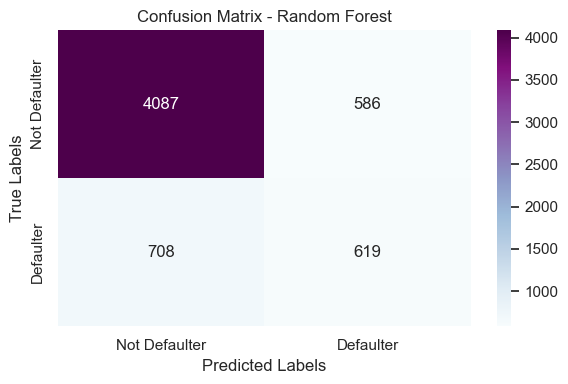

In [191]:
# 📌 Import and plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

# 🧾 Print Confusion Matrix
print("\nConfusion Matrix:\n", cm_rfc)

# 📊 Plot
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='BuPu', xticklabels=labels, yticklabels=labels)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()


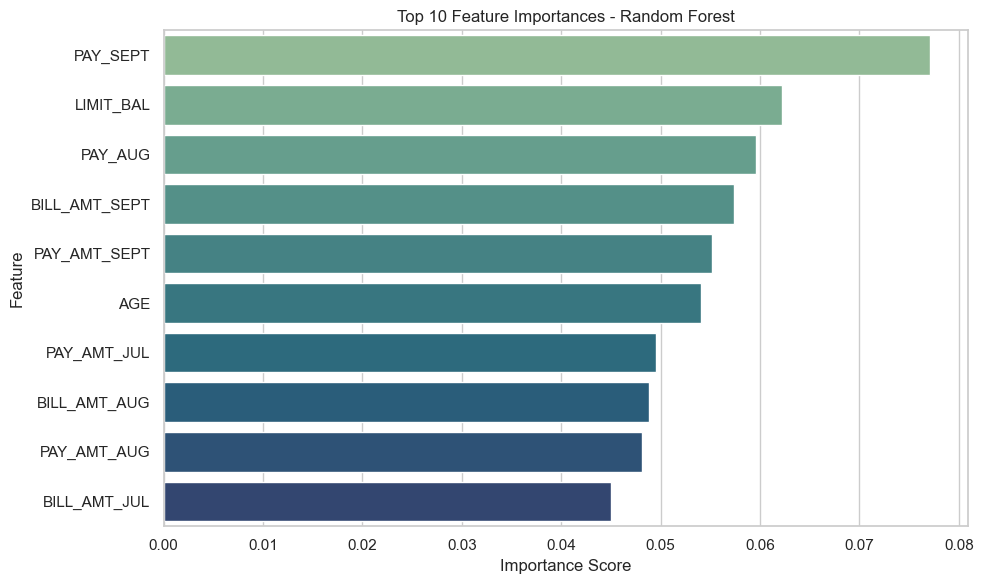

In [192]:
# 📌 Plot top 10 feature importances
import pandas as pd

feature_names = X_train.columns  # Assuming X_train is a DataFrame
importances = rfc.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 📊 Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='crest')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [193]:
from sklearn.svm import SVC

# 📌 Initialize and fit SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train_sm)


SVC(probability=True, random_state=42)

In [194]:
# 🔮 Predictions
y_pred_svm = svm.predict(X_test_scaled)
y_train_pred_svm = svm.predict(X_train_scaled)


In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 🎯 Compute scores
train_accuracy_svm = round(accuracy_score(y_train_sm, y_train_pred_svm), 3)
test_accuracy_svm = round(accuracy_score(y_test, y_pred_svm), 3)
precision_svm = round(precision_score(y_test, y_pred_svm), 3)
recall_svm = round(recall_score(y_test, y_pred_svm), 3)
f1_svm = round(f1_score(y_test, y_pred_svm), 3)
roc_auc_svm = round(roc_auc_score(y_test, y_pred_svm), 3)

# 📊 Print
print("📌 Support Vector Machine Evaluation Results:")
print("Train Accuracy       :", train_accuracy_svm)
print("Test Accuracy        :", test_accuracy_svm)
print("Precision (Test)     :", precision_svm)
print("Recall (Test)        :", recall_svm)
print("F1 Score (Test)      :", f1_svm)
print("ROC AUC Score (Test) :", roc_auc_svm)


📌 Support Vector Machine Evaluation Results:
Train Accuracy       : 0.773
Test Accuracy        : 0.735
Precision (Test)     : 0.425
Recall (Test)        : 0.562
F1 Score (Test)      : 0.484
ROC AUC Score (Test) : 0.673


# Gradient Boosting


In [197]:
from sklearn.ensemble import GradientBoostingClassifier

# 📌 Initialize and train the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train_scaled, y_train_sm)

#🔧 You can tune n_estimators, learning_rate, max_depth, etc., later using GridSearchCV.



GradientBoostingClassifier(random_state=42)

In [198]:
# 🔮 Predict on test and train data
y_pred_gbc = gbc.predict(X_test_scaled)
y_train_pred_gbc = gbc.predict(X_train_scaled)


In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 🎯 Calculate scores
train_accuracy_gbc = round(accuracy_score(y_train_sm, y_train_pred_gbc), 3)
test_accuracy_gbc = round(accuracy_score(y_test, y_pred_gbc), 3)
precision_gbc = round(precision_score(y_test, y_pred_gbc), 3)
recall_gbc = round(recall_score(y_test, y_pred_gbc), 3)
f1_gbc = round(f1_score(y_test, y_pred_gbc), 3)
roc_auc_gbc = round(roc_auc_score(y_test, y_pred_gbc), 3)

# 📊 Print results
print("📌 Gradient Boosting Evaluation Results:")
print("Train Accuracy       :", train_accuracy_gbc)
print("Test Accuracy        :", test_accuracy_gbc)
print("Precision (Test)     :", precision_gbc)
print("Recall (Test)        :", recall_gbc)
print("F1 Score (Test)      :", f1_gbc)
print("ROC AUC Score (Test) :", roc_auc_gbc)


📌 Gradient Boosting Evaluation Results:
Train Accuracy       : 0.794
Test Accuracy        : 0.762
Precision (Test)     : 0.467
Recall (Test)        : 0.54
F1 Score (Test)      : 0.501
ROC AUC Score (Test) : 0.682


# XG Boosting


In [201]:
from xgboost import XGBClassifier

# 📌 Initialize and train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train_sm)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [202]:
from sklearn.ensemble import AdaBoostClassifier

# 📌 Initialize and train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train_scaled, y_train_sm)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [203]:
# 🔮 Predict on test and train data
y_pred_ada = ada_model.predict(X_test_scaled)
y_train_pred_ada = ada_model.predict(X_train_scaled)


In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ✅ Compute scores
train_accuracy_ada = round(accuracy_score(y_train_sm, y_train_pred_ada), 3)
test_accuracy_ada = round(accuracy_score(y_test, y_pred_ada), 3)
precision_ada = round(precision_score(y_test, y_pred_ada), 3)
recall_ada = round(recall_score(y_test, y_pred_ada), 3)
f1_ada = round(f1_score(y_test, y_pred_ada), 3)
roc_auc_ada = round(roc_auc_score(y_test, y_pred_ada), 3)

# 📋 Print results
print("📌 AdaBoost Evaluation Results:")
print("Train Accuracy       :", train_accuracy_ada)
print("Test Accuracy        :", test_accuracy_ada)
print("Precision (Test)     :", precision_ada)
print("Recall (Test)        :", recall_ada)
print("F1 Score (Test)      :", f1_ada)
print("ROC AUC Score (Test) :", roc_auc_ada)


📌 AdaBoost Evaluation Results:
Train Accuracy       : 0.734
Test Accuracy        : 0.742
Precision (Test)     : 0.436
Recall (Test)        : 0.567
F1 Score (Test)      : 0.493
ROC AUC Score (Test) : 0.679


Confusion Matrix:
 [[3700  973]
 [ 575  752]]


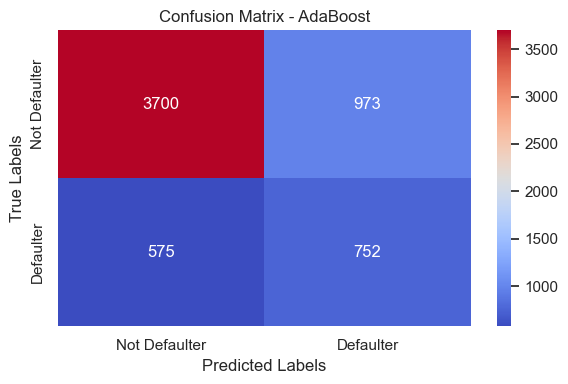

In [205]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
labels = ['Not Defaulter', 'Defaulter']
cm_ada = confusion_matrix(y_test, y_pred_ada)

print("Confusion Matrix:\n", cm_ada)

# Plotting
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm_ada, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix - AdaBoost')
plt.tight_layout()
plt.show()


# Baseline Model Comparision


In [207]:
# 🧮 Model Evaluation Summary (Excluding XGBoost)
models_scores = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'AdaBoost'],
    'Train Accuracy': [
        round(accuracy_score(y_train_sm, y_train_pred_logi), 3),
        round(accuracy_score(y_train_sm, y_train_pred_dtc), 3),
        round(accuracy_score(y_train_sm, y_train_pred_rfc), 3),
        round(accuracy_score(y_train_sm, y_train_pred_svm), 3),
        round(accuracy_score(y_train_sm, y_train_pred_gbc), 3),
        round(accuracy_score(y_train_sm, y_train_pred_ada), 3),
    ],
    'Test Accuracy': [
        round(accuracy_score(y_test, y_pred_logi), 3),
        round(accuracy_score(y_test, y_pred_dtc), 3),
        round(accuracy_score(y_test, y_pred_rfc), 3),
        round(accuracy_score(y_test, y_pred_svm), 3),
        round(accuracy_score(y_test, y_pred_gbc), 3),
        round(accuracy_score(y_test, y_pred_ada), 3),
    ],
    'Precision': [
        round(precision_score(y_test, y_pred_logi), 3),
        round(precision_score(y_test, y_pred_dtc), 3),
        round(precision_score(y_test, y_pred_rfc), 3),
        round(precision_score(y_test, y_pred_svm), 3),
        round(precision_score(y_test, y_pred_gbc), 3),
        round(precision_score(y_test, y_pred_ada), 3),
    ],
    'Recall': [
        round(recall_score(y_test, y_pred_logi), 3),
        round(recall_score(y_test, y_pred_dtc), 3),
        round(recall_score(y_test, y_pred_rfc), 3),
        round(recall_score(y_test, y_pred_svm), 3),
        round(recall_score(y_test, y_pred_gbc), 3),
        round(recall_score(y_test, y_pred_ada), 3),
    ],
    'F1 Score': [
        round(f1_score(y_test, y_pred_logi), 3),
        round(f1_score(y_test, y_pred_dtc), 3),
        round(f1_score(y_test, y_pred_rfc), 3),
        round(f1_score(y_test, y_pred_svm), 3),
        round(f1_score(y_test, y_pred_gbc), 3),
        round(f1_score(y_test, y_pred_ada), 3),
    ],
    'ROC AUC Score': [
        round(roc_auc_score(y_test, y_pred_logi), 3),
        round(roc_auc_score(y_test, y_pred_dtc), 3),
        round(roc_auc_score(y_test, y_pred_rfc), 3),
        round(roc_auc_score(y_test, y_pred_svm), 3),
        round(roc_auc_score(y_test, y_pred_gbc), 3),
        round(roc_auc_score(y_test, y_pred_ada), 3),
    ]
}

# 📊 Create DataFrame
import pandas as pd
comparison_df = pd.DataFrame(models_scores)

# 📋 Display Sorted by F1 Score
print("\n📌 Model Comparison (Without XGBoost):")
display(comparison_df.sort_values(by='F1 Score', ascending=False))



📌 Model Comparison (Without XGBoost):


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC Score
4,Gradient Boosting,0.794,0.762,0.467,0.540,0.501,0.682
5,AdaBoost,0.734,0.742,0.436,0.567,0.493,0.679
2,Random Forest,0.999,0.784,0.514,0.466,0.489,0.671
3,SVM,0.773,0.735,0.425,0.562,0.484,0.673
0,Logistic Regression,0.704,0.674,0.355,0.579,0.440,0.640
1,Decision Tree,0.999,0.692,0.355,0.481,0.409,0.616


In [ ]:
# ✅ Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# ✅ Train all models
lr_model = LogisticRegression(max_iter=10000, random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
svm_model = SVC(probability=True, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

lr_model.fit(X_train_scaled, y_train_sm)
dtc.fit(X_train_scaled, y_train_sm)
rfc.fit(X_train_scaled, y_train_sm)
svm_model.fit(X_train_scaled, y_train_sm)
gbc.fit(X_train_scaled, y_train_sm)
ada.fit(X_train_scaled, y_train_sm)

# ✅ Store models
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "SVM": svm_model,
    "Gradient Boosting": gbc,
    "AdaBoost": ada
}

# ✅ Get ROC Scores
plt.figure(figsize=(10, 7))
for name, model in models.items():
    if name == "SVM":
        y_score = model.decision_function(X_test_scaled)
    else:
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
